### Voronoi Optimistic Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import cos_exp_square_nd,plot_line,x_sampler,get_best_xy,sample_from_best_voronoi_cell
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded.")

Packages Loaded.


In [2]:
def func_eval(x): # x:[n x d]
    y = cos_exp_square_nd(x)
    return y # y:[n x 1]

### Target Cost Function

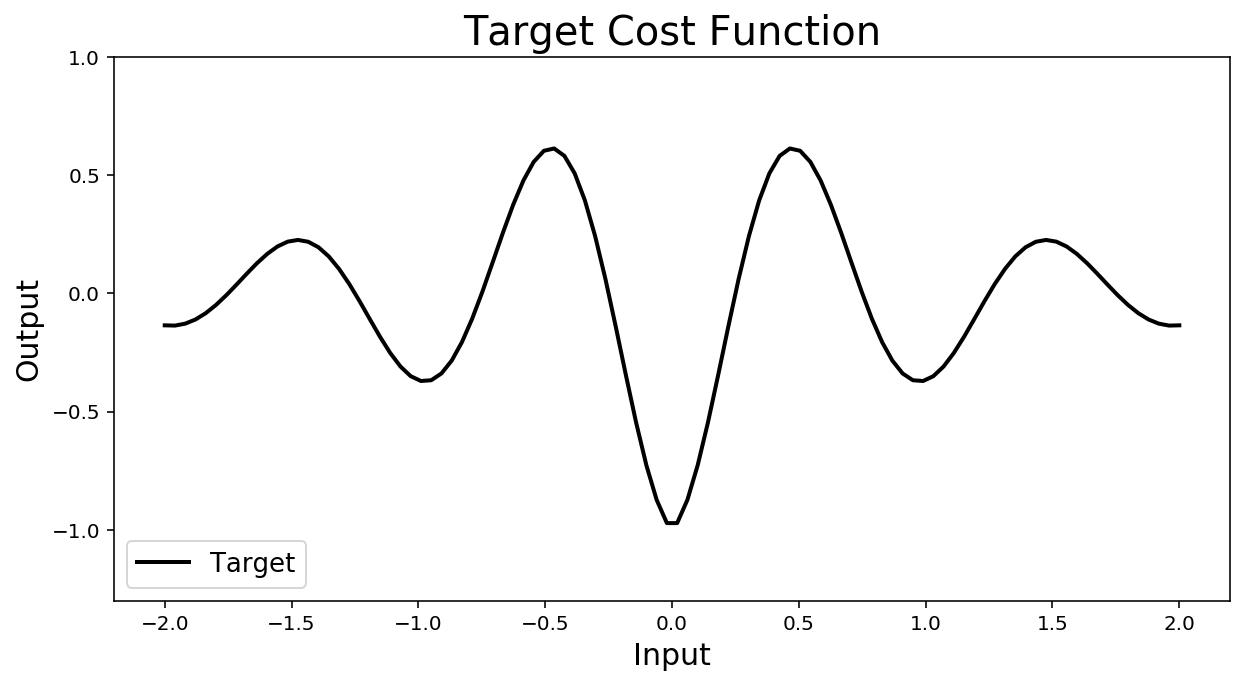

In [3]:
xmin,xmax = -2,2
x_target = np.linspace(start=xmin,stop=xmax,num=100).reshape((-1,1))
y_target = func_eval(x_target)
plot_line(
    x_target,y_target,fmt='-',lc='k',lw=2,label='Target',
    figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,tstr='Target Cost Function',tfs=20,
    ylim=[-1.3,+1],
    lfs=13,lloc='lower left')

### VOO

In [17]:
seed,x_minmax = 1,np.array([[xmin,xmax]])
max_step = 15

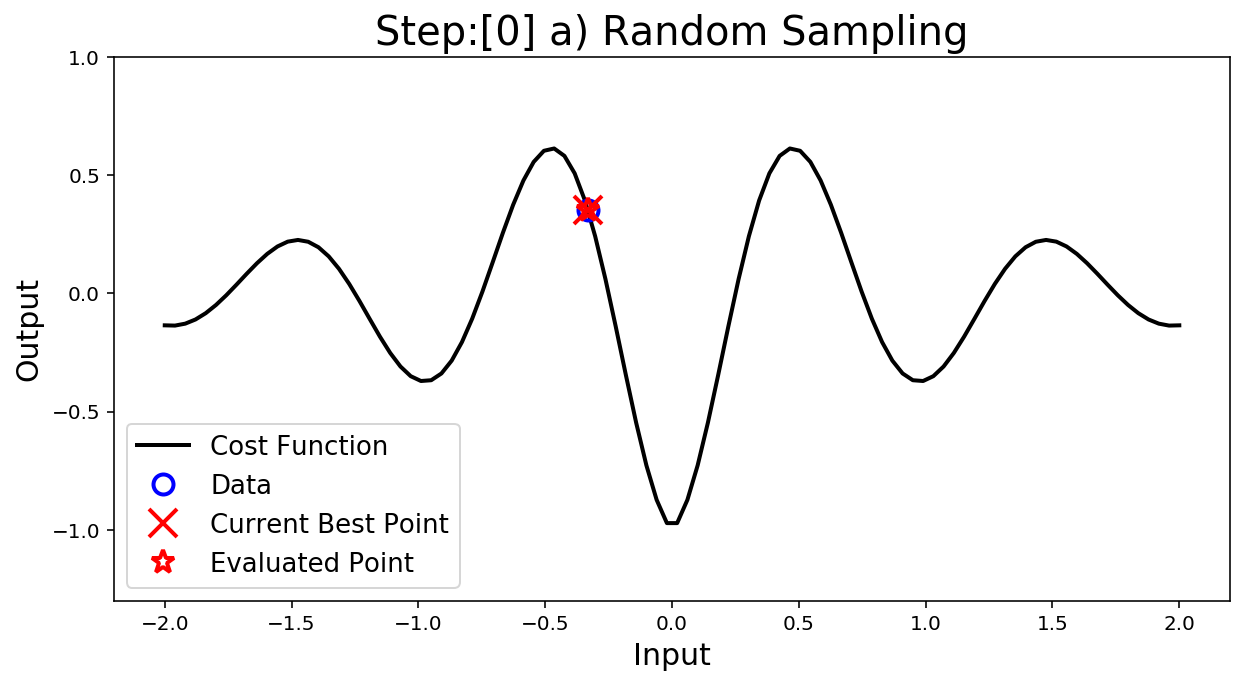

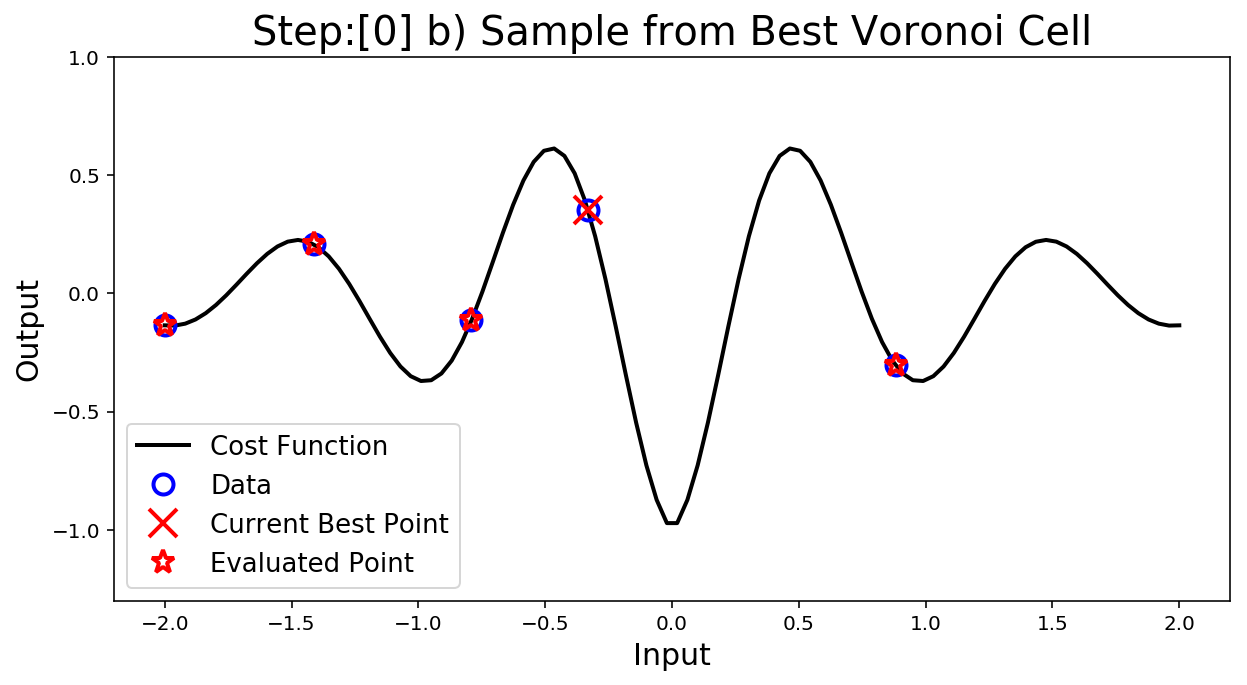

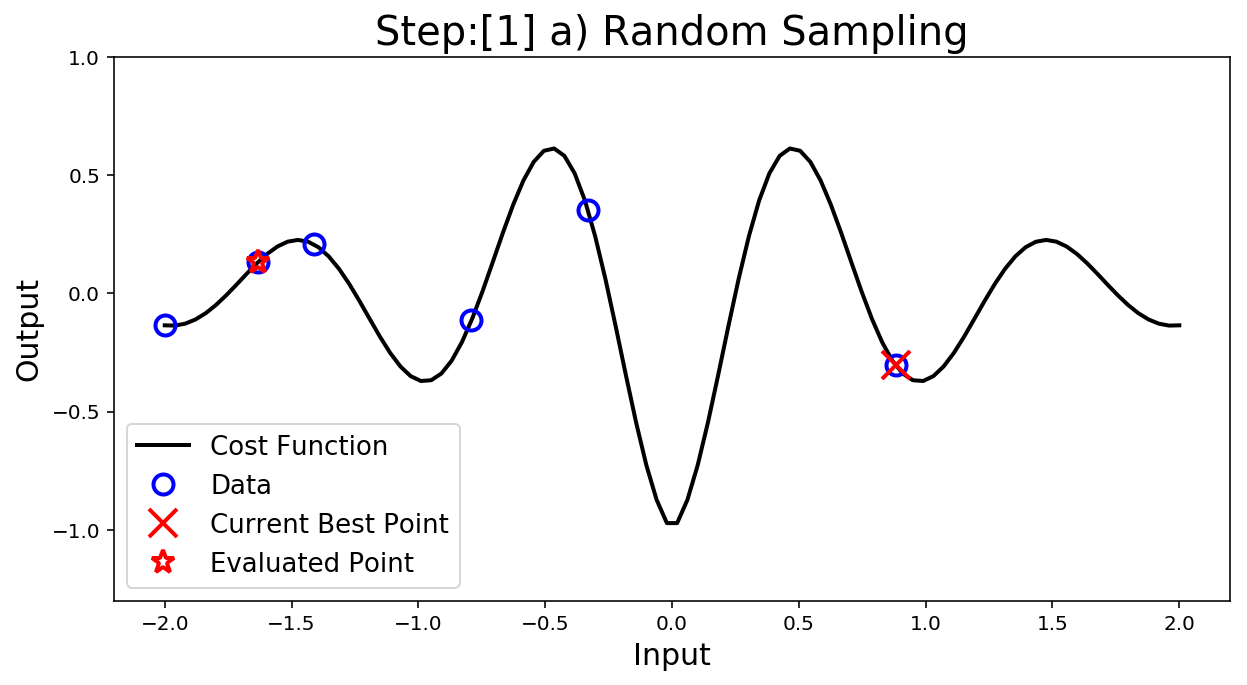

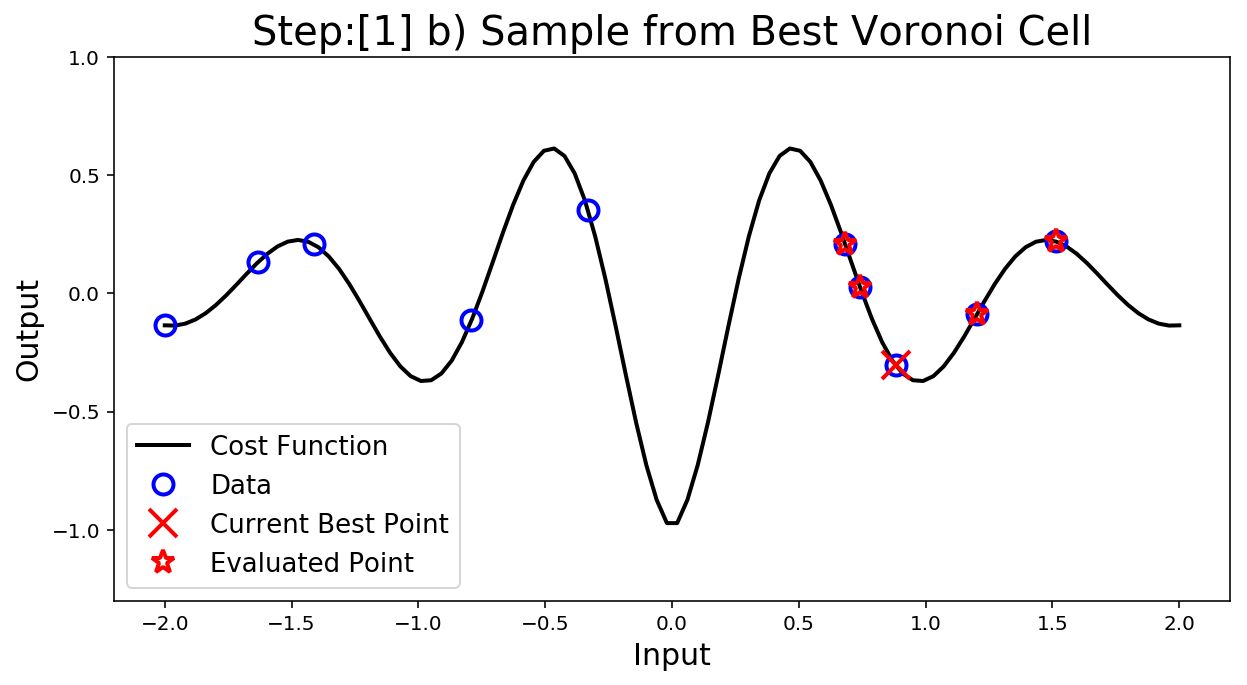

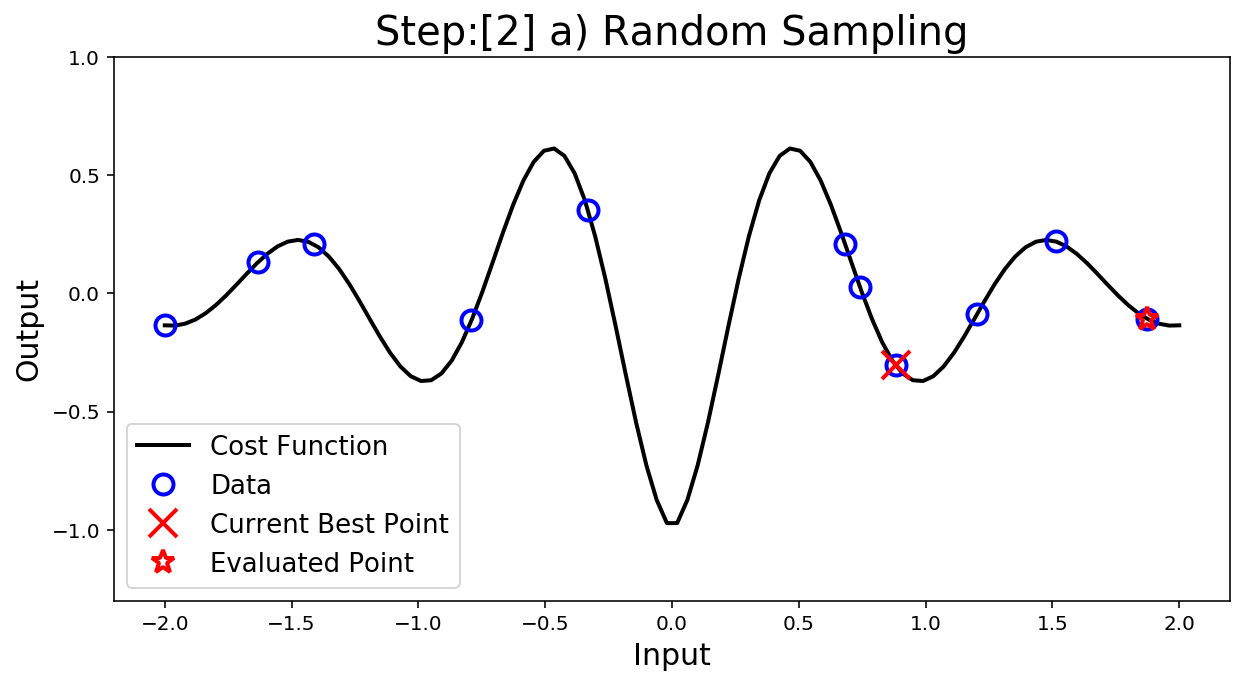

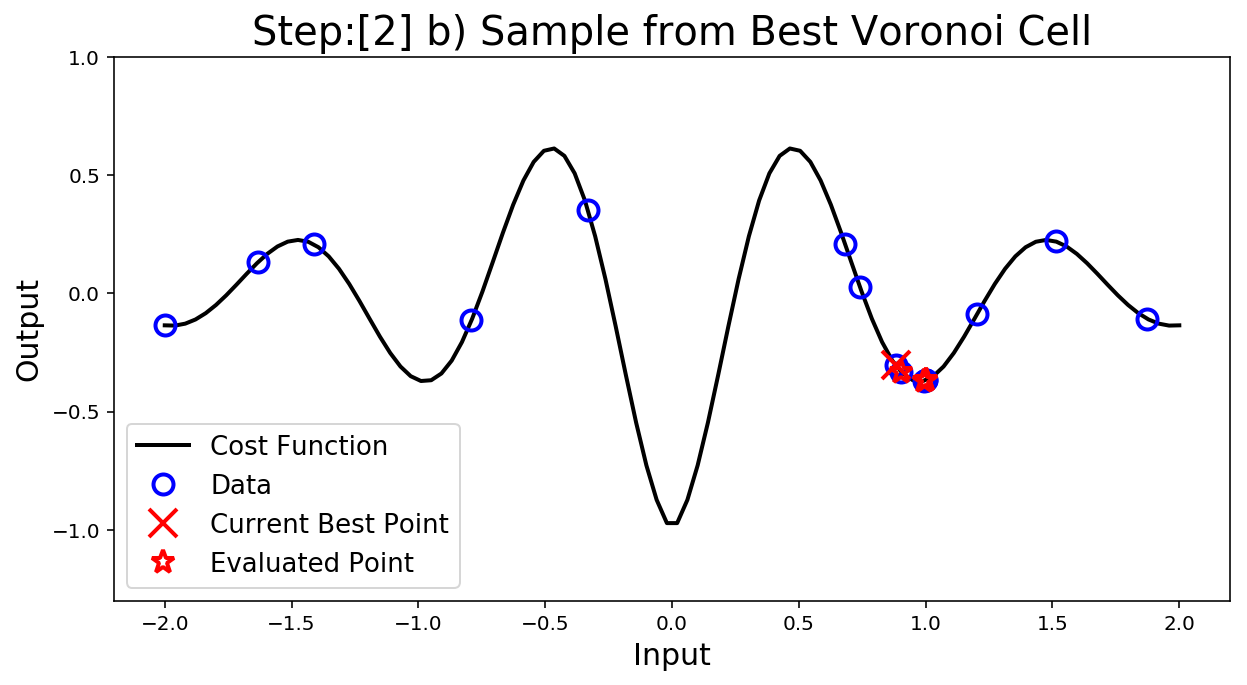

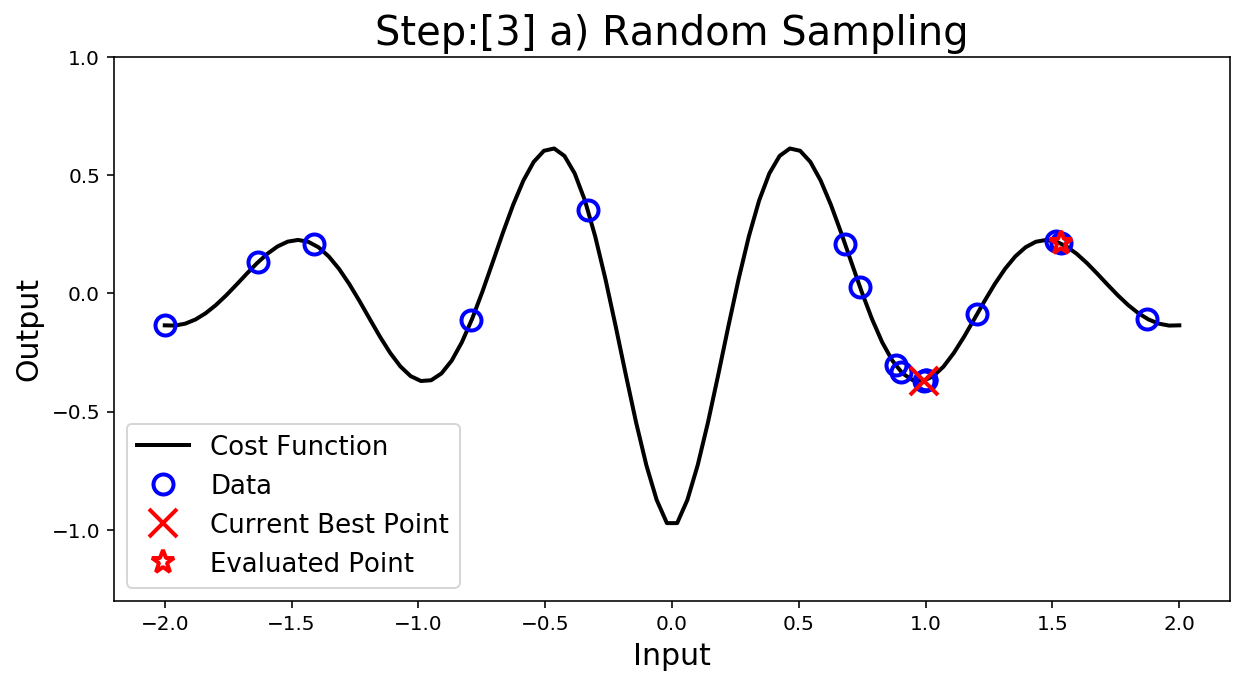

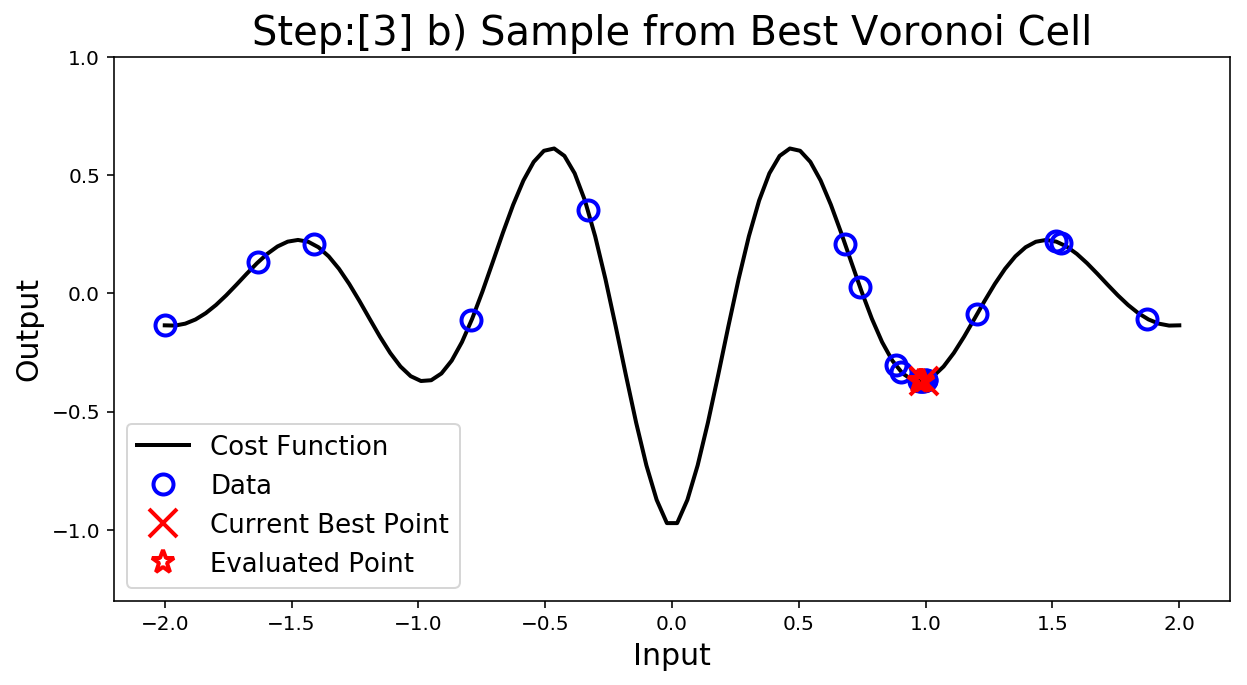

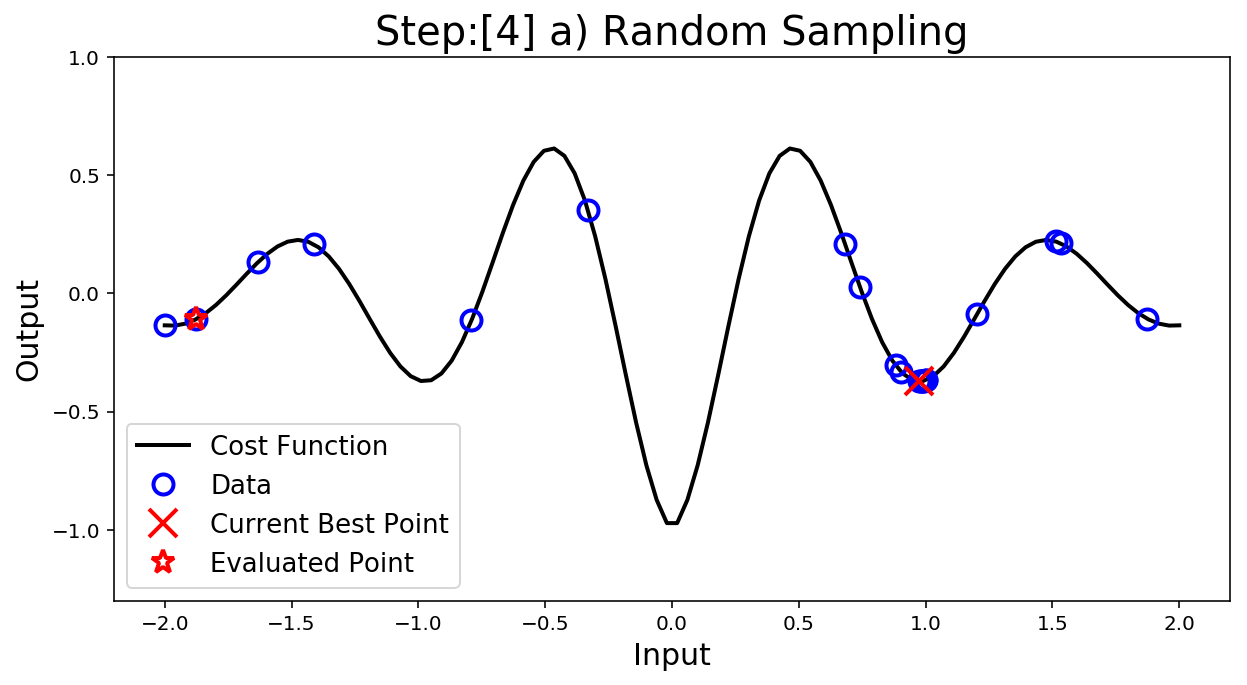

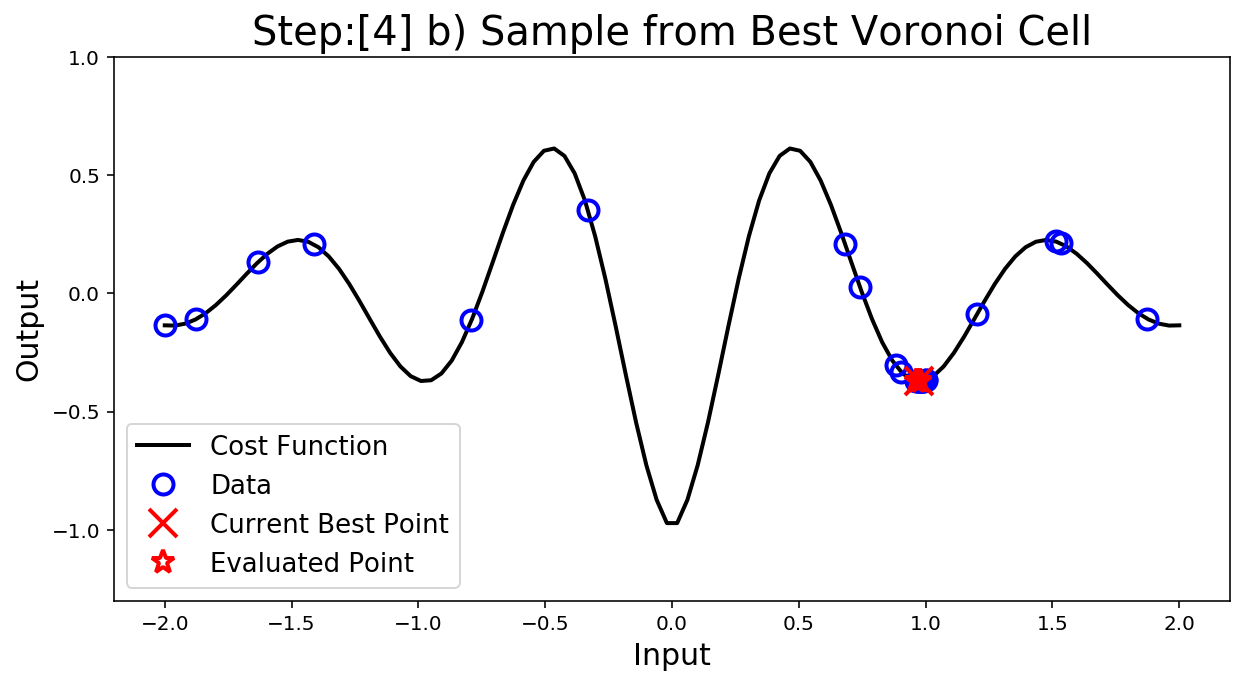

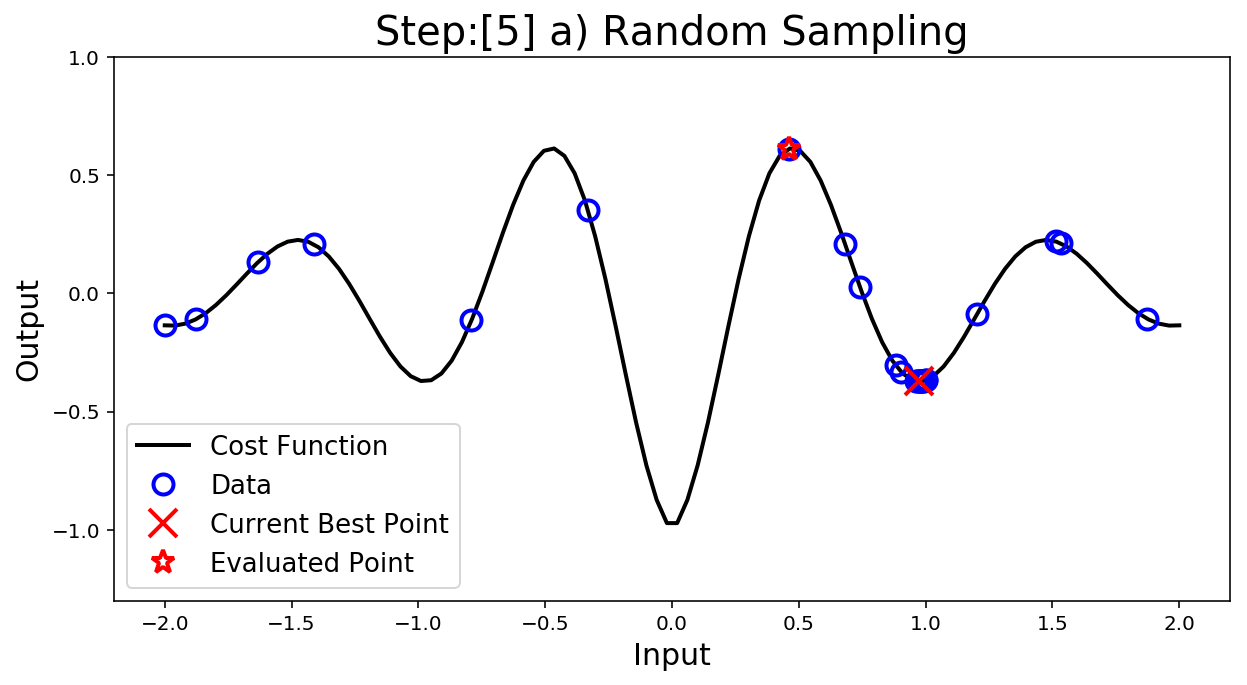

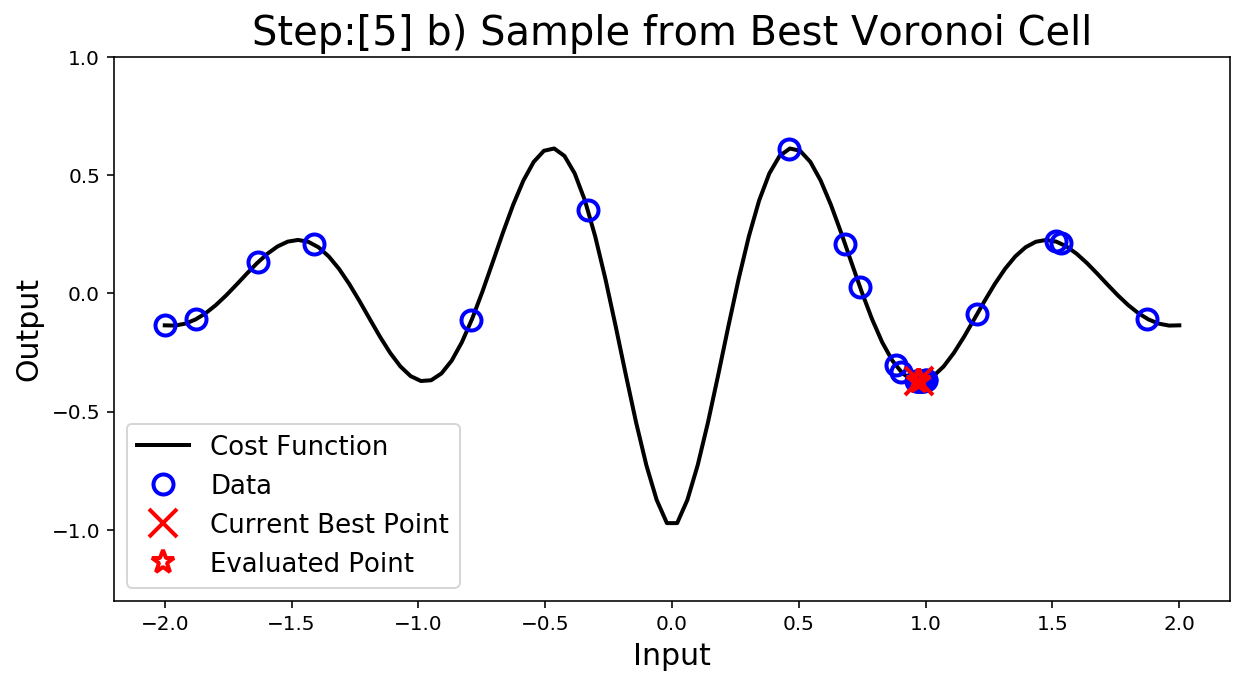

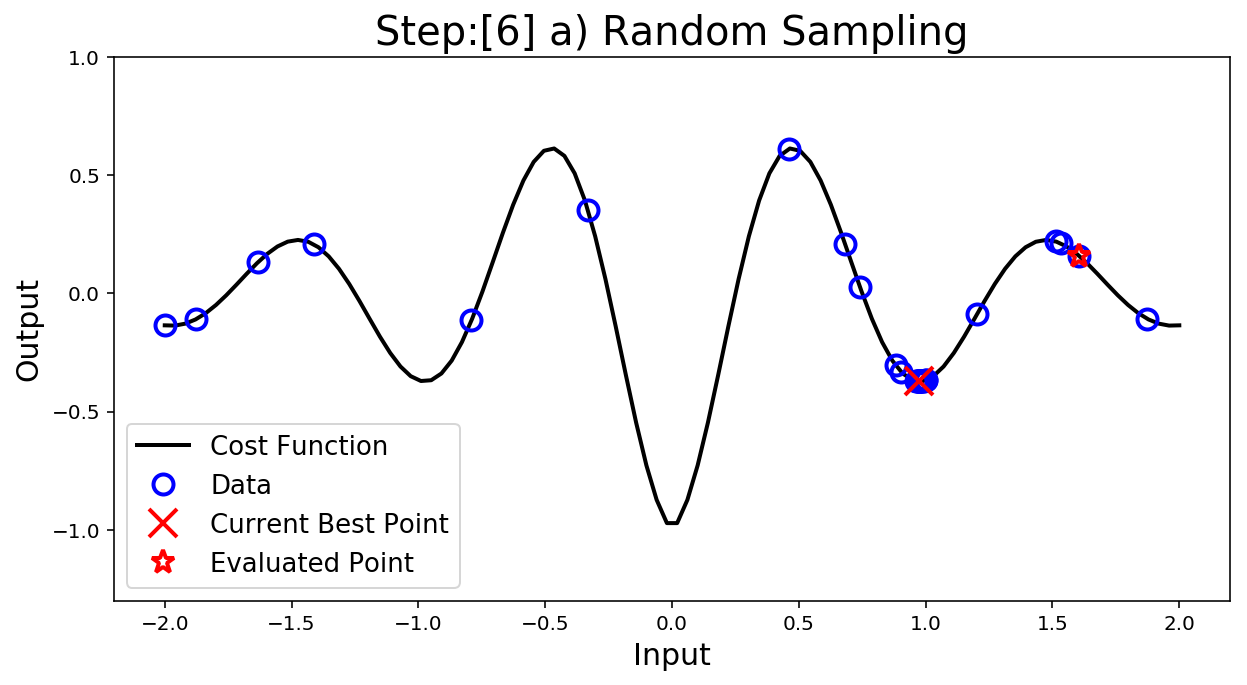

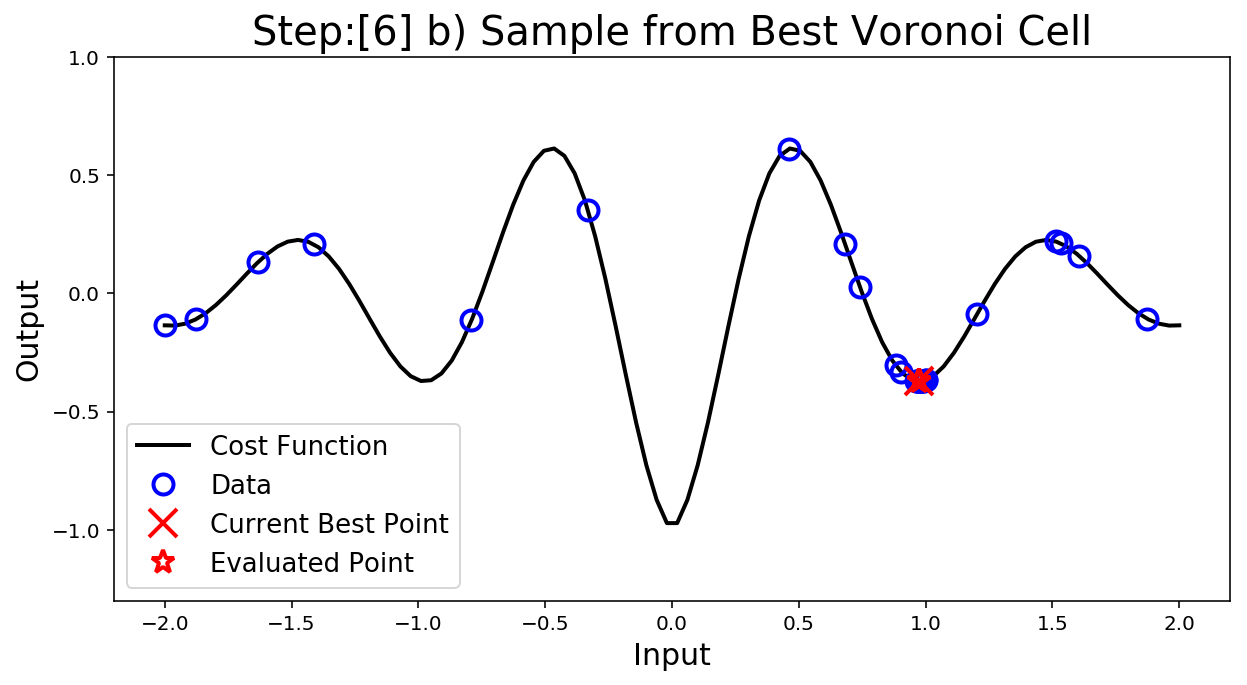

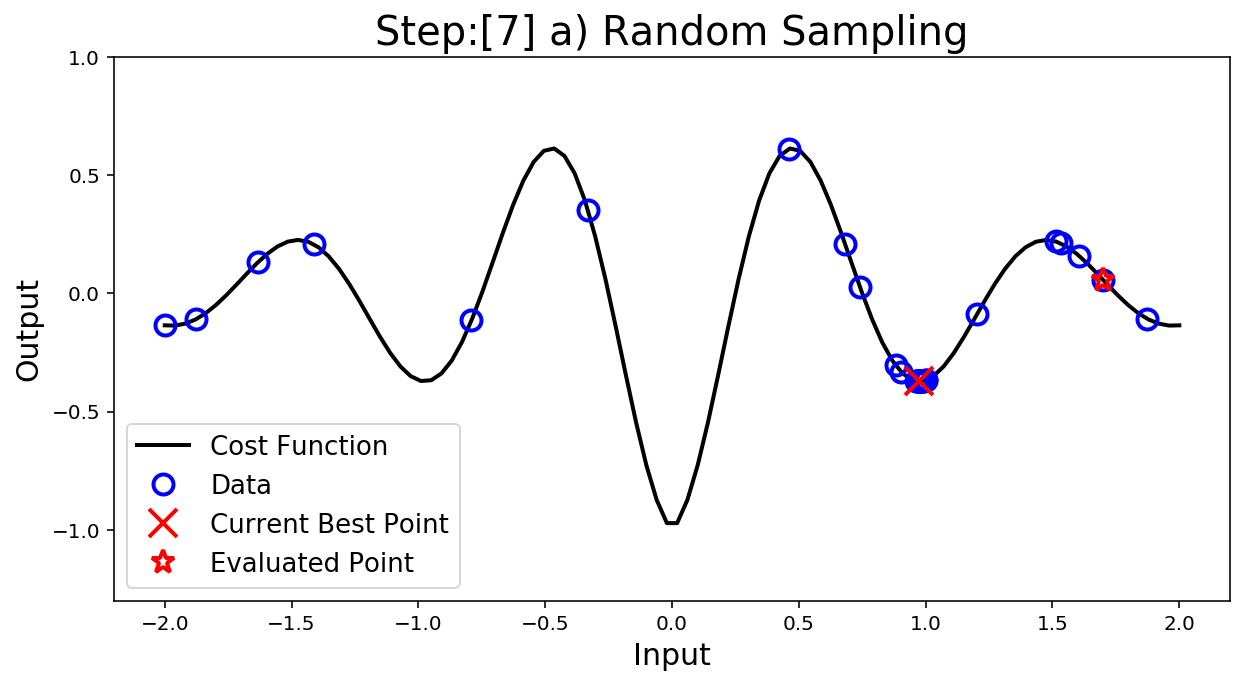

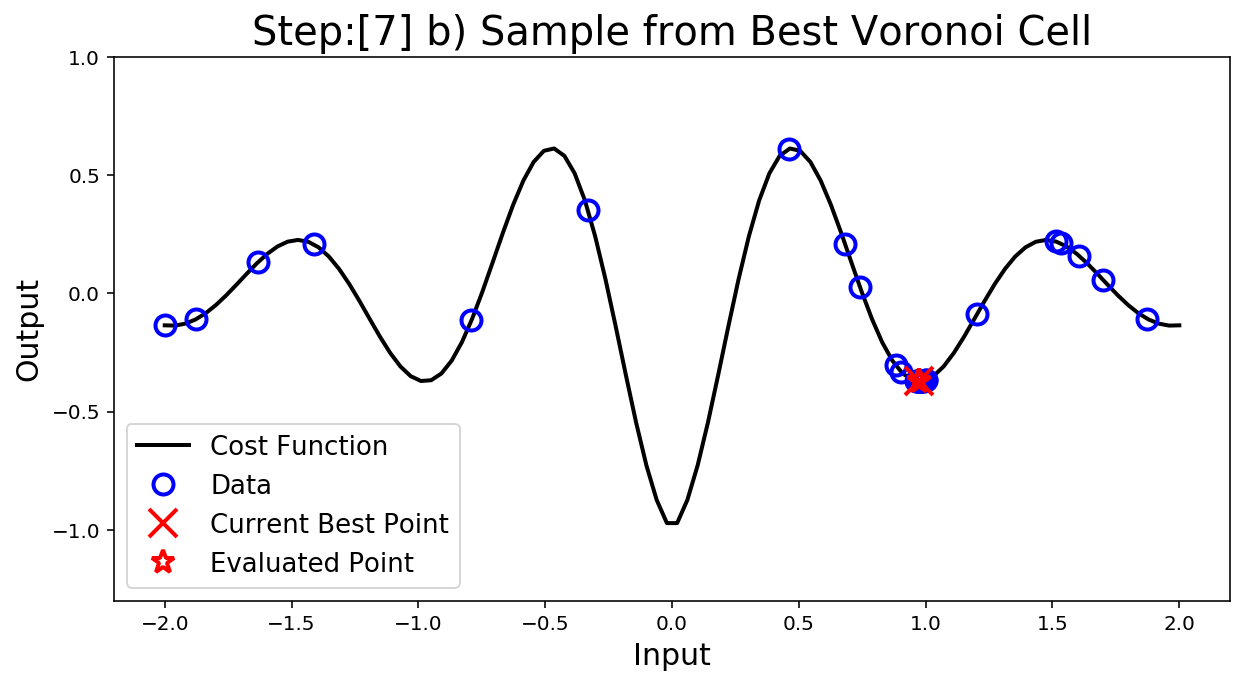

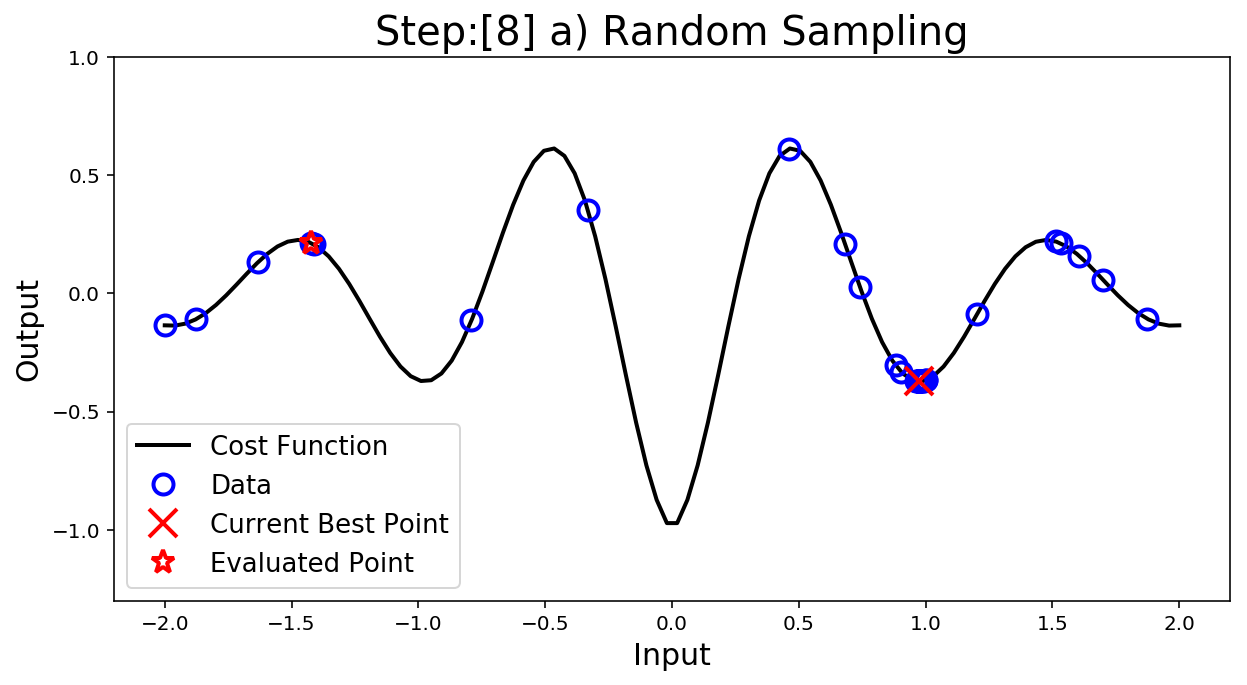

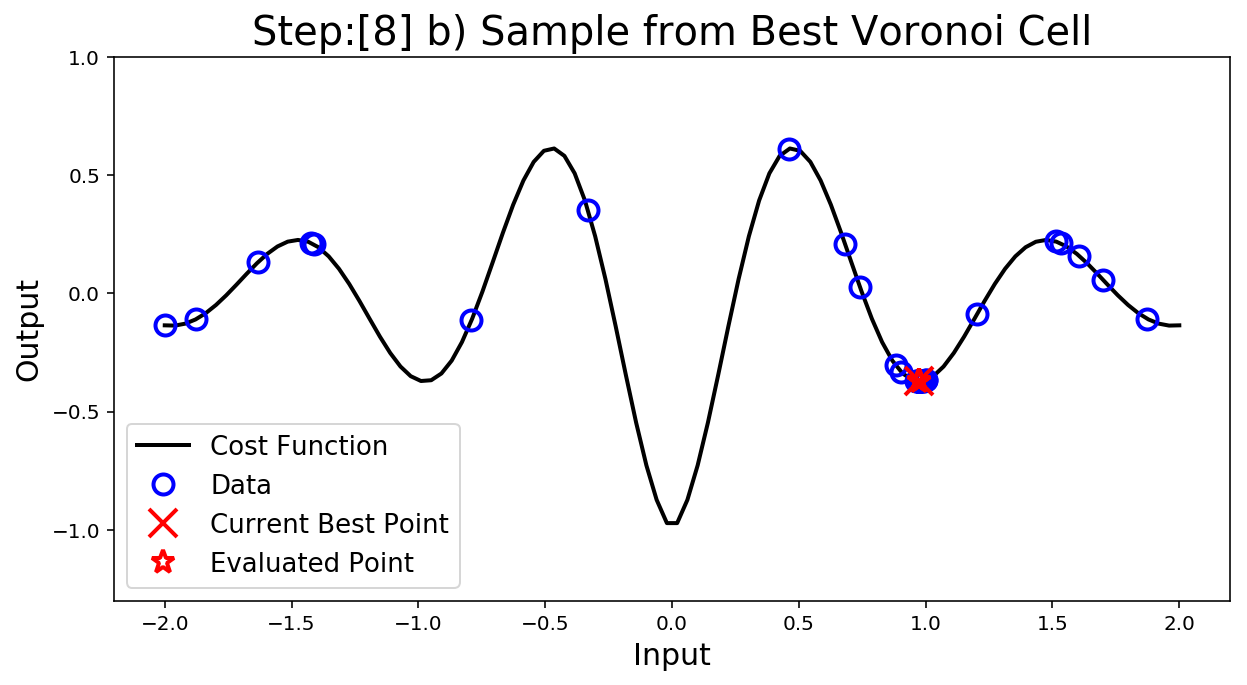

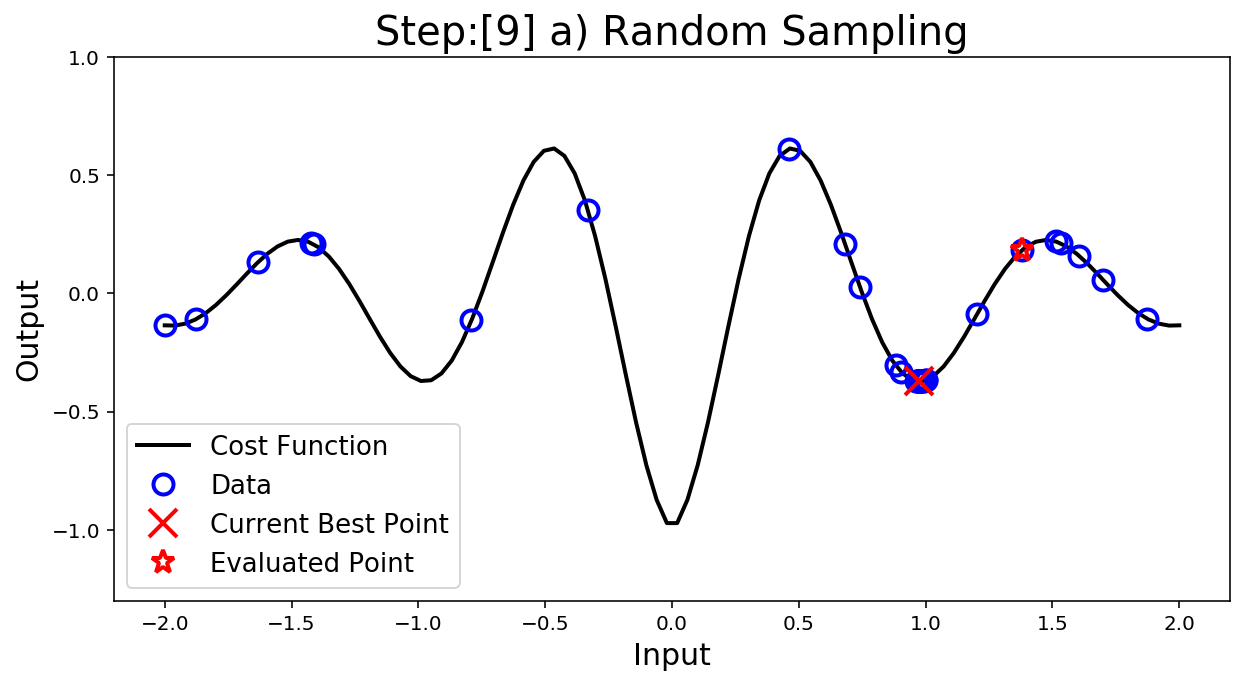

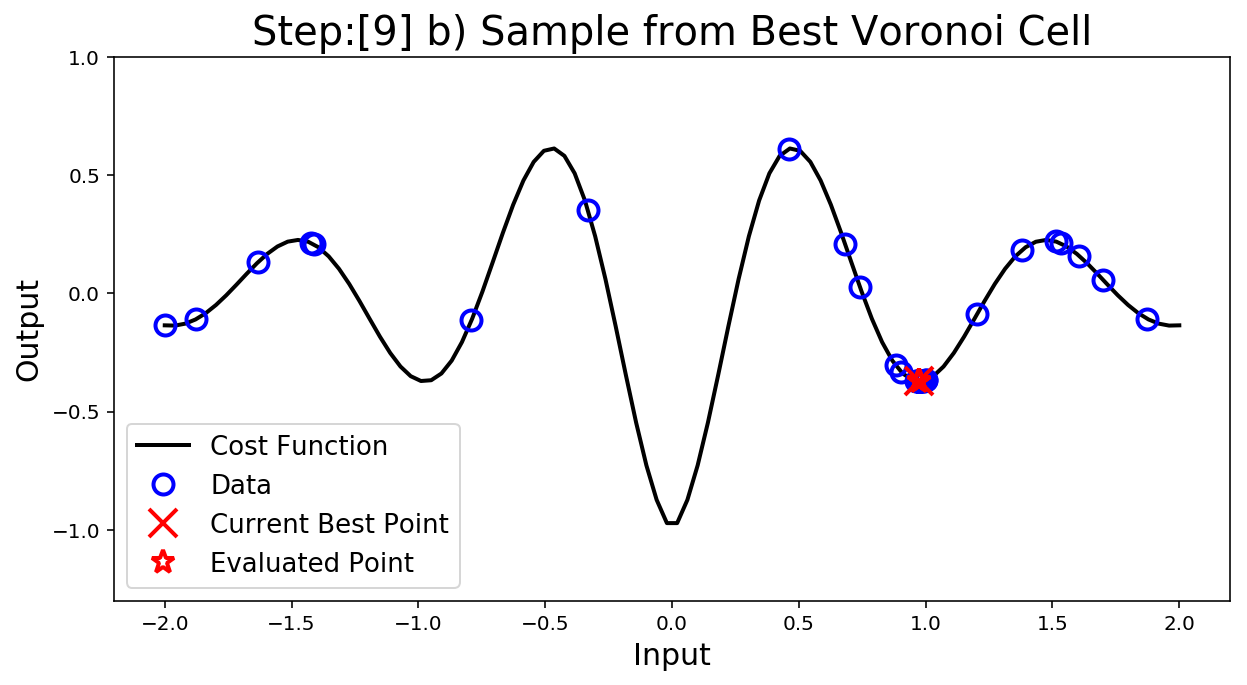

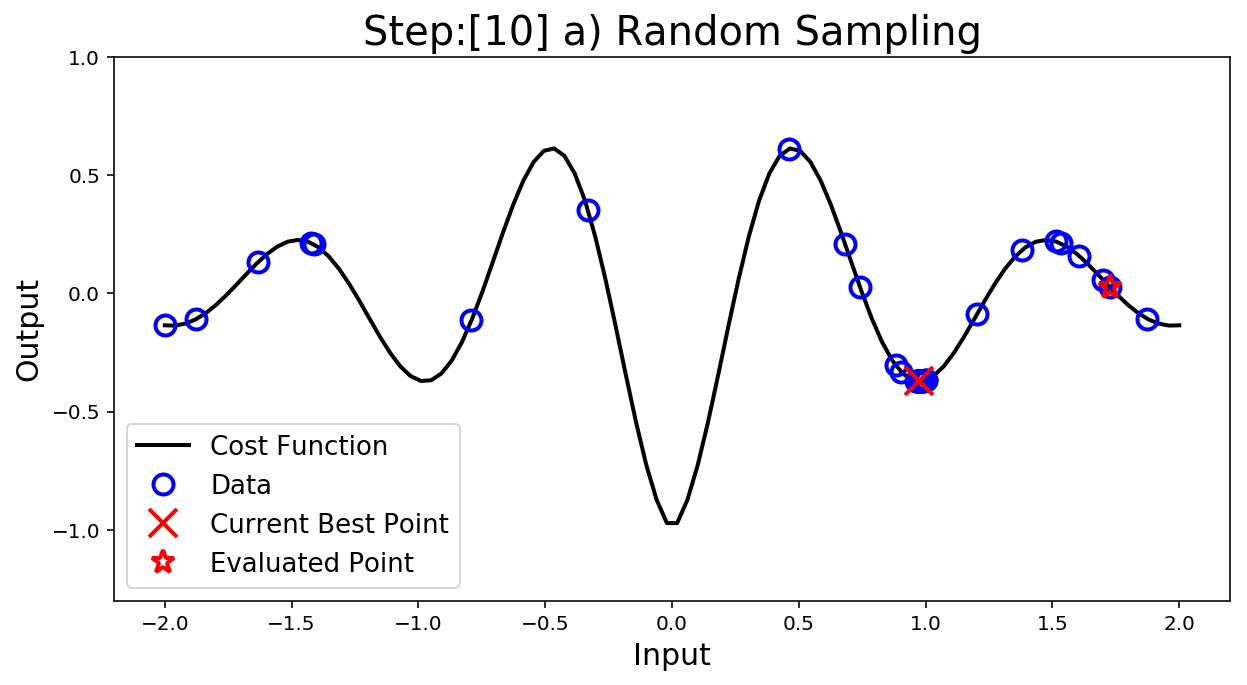

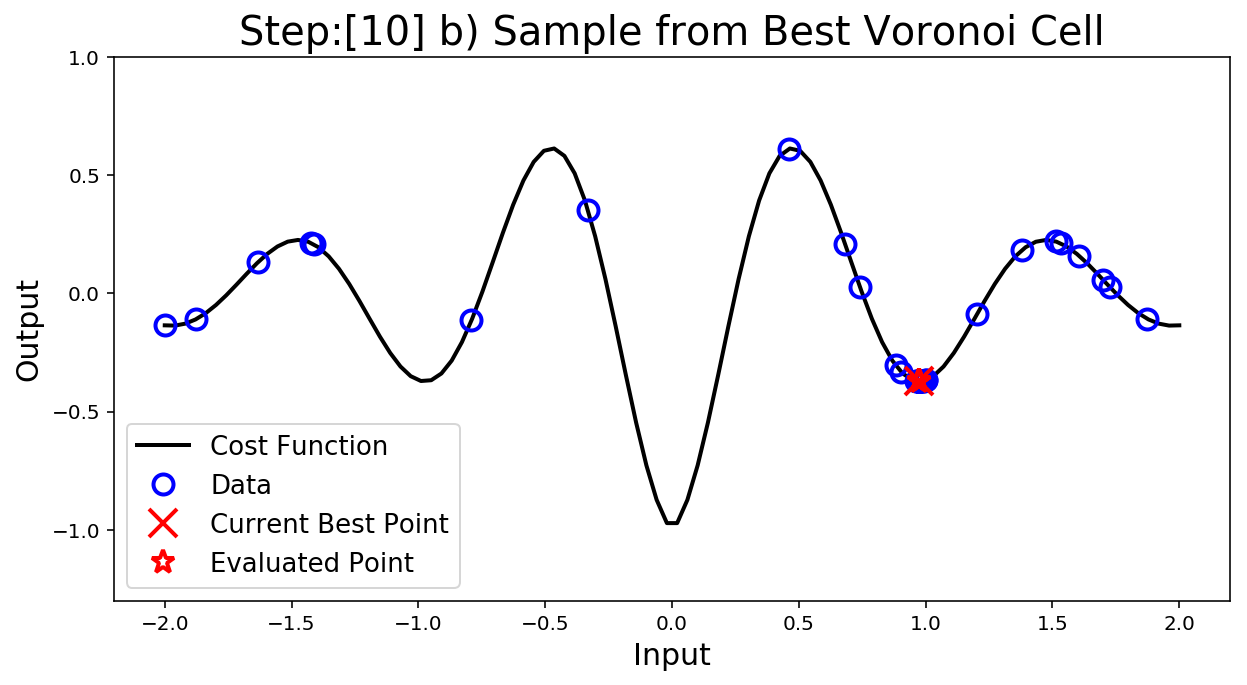

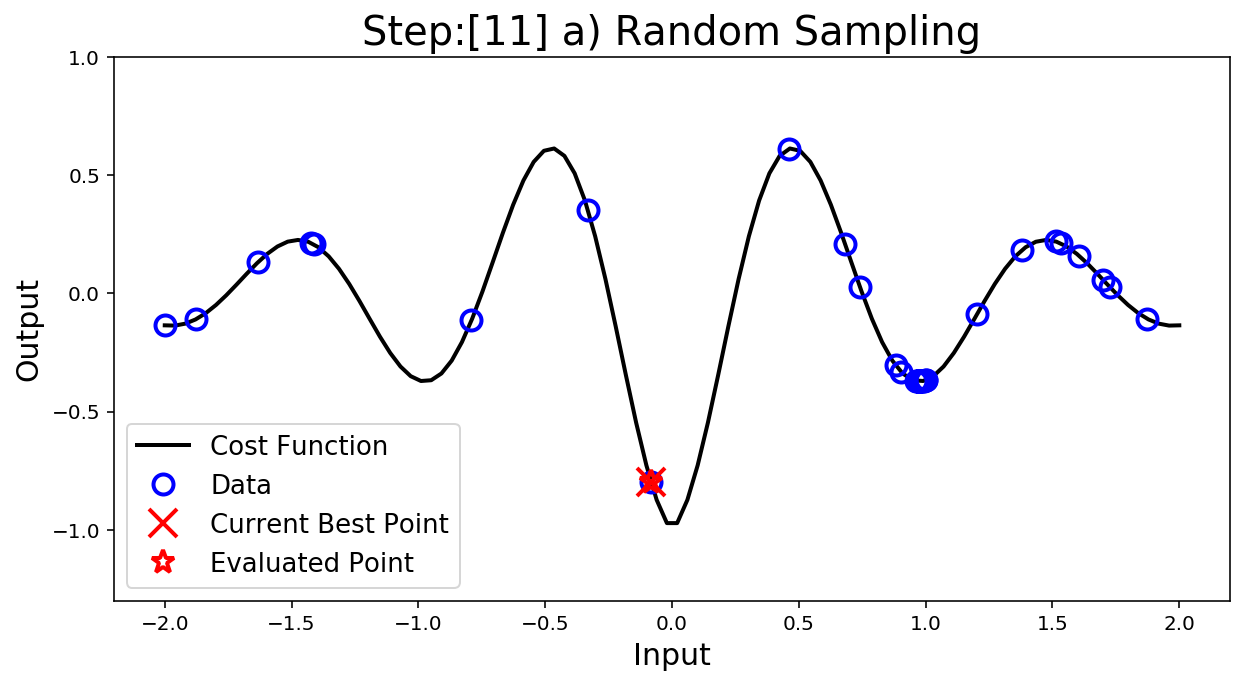

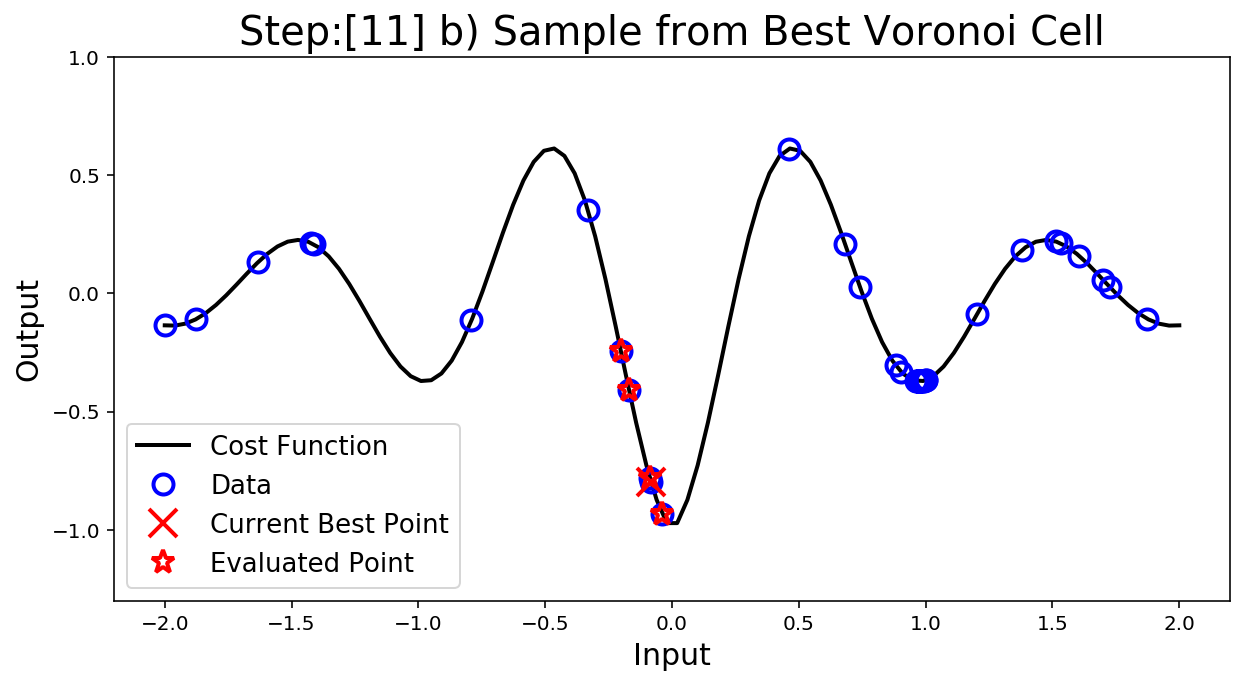

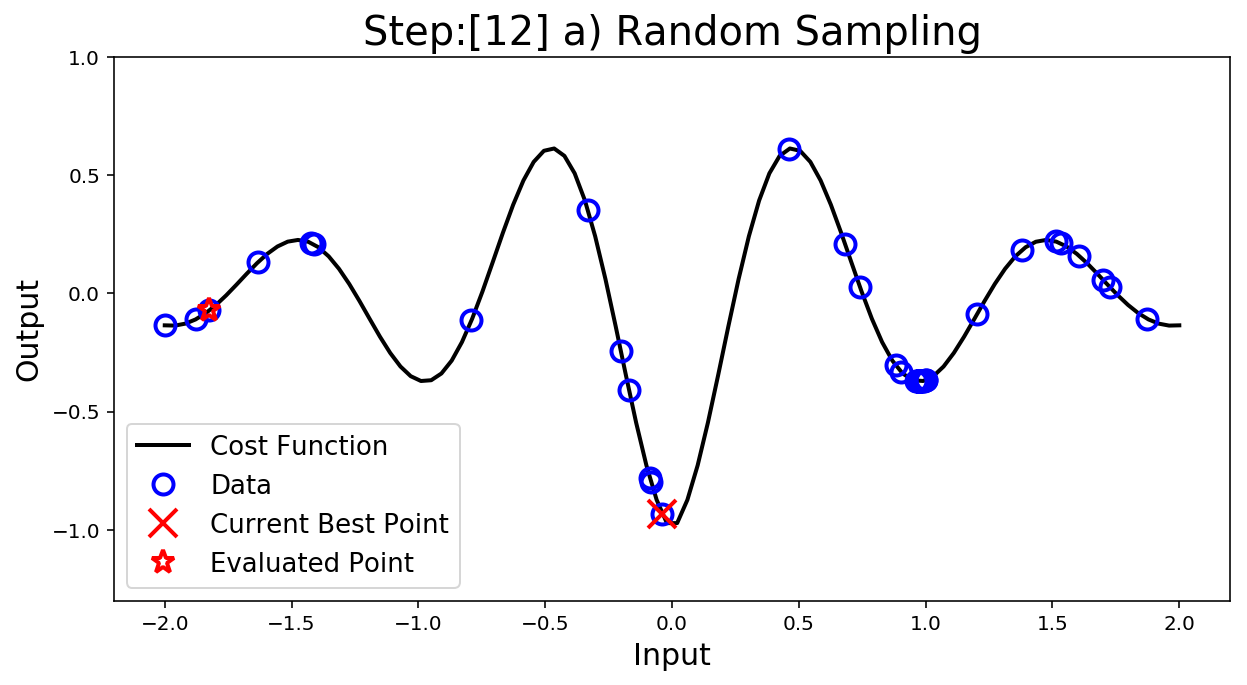

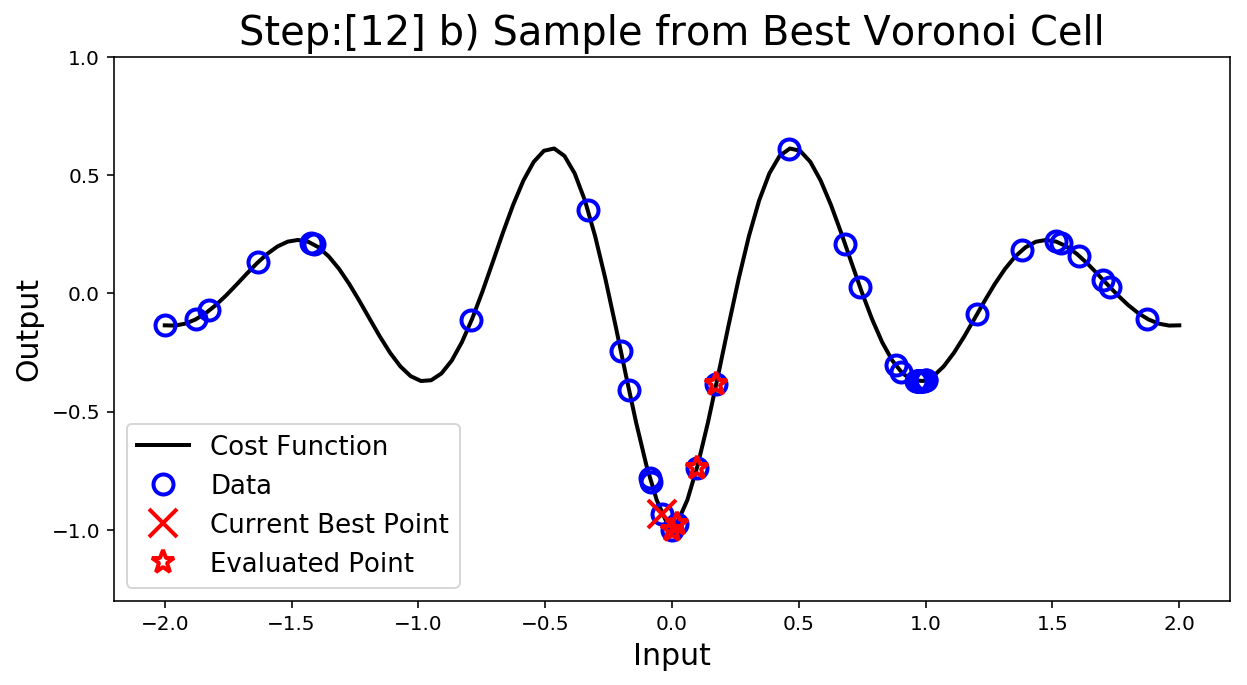

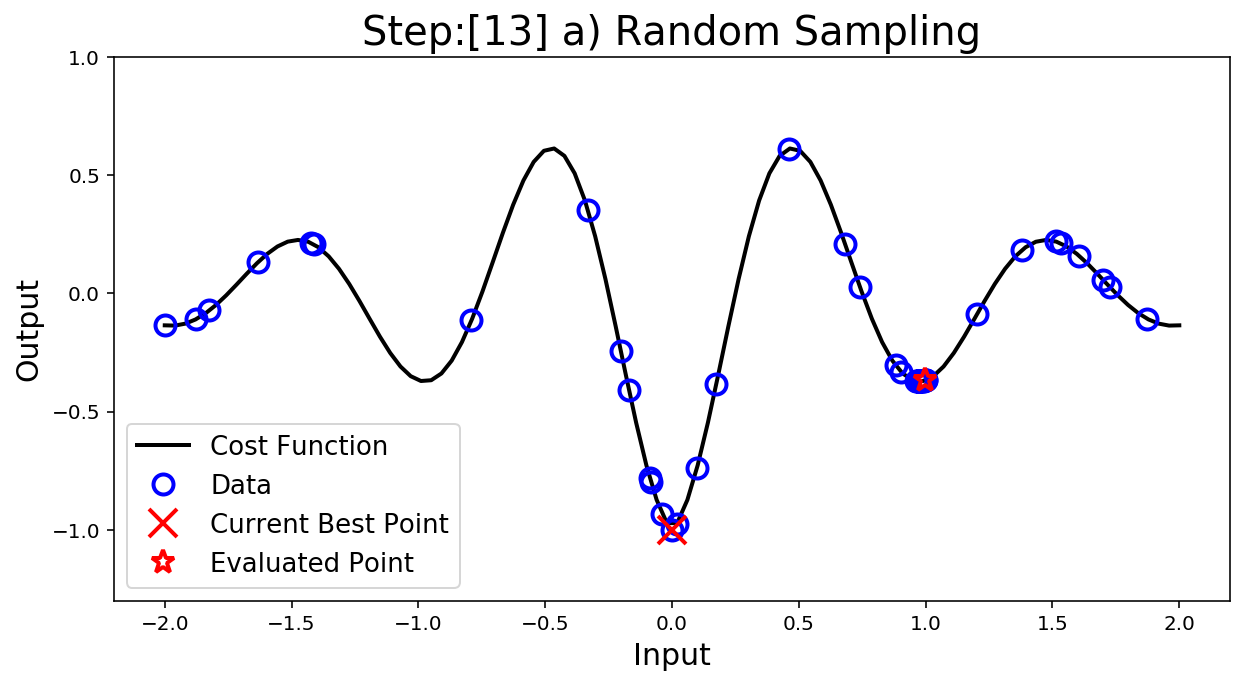

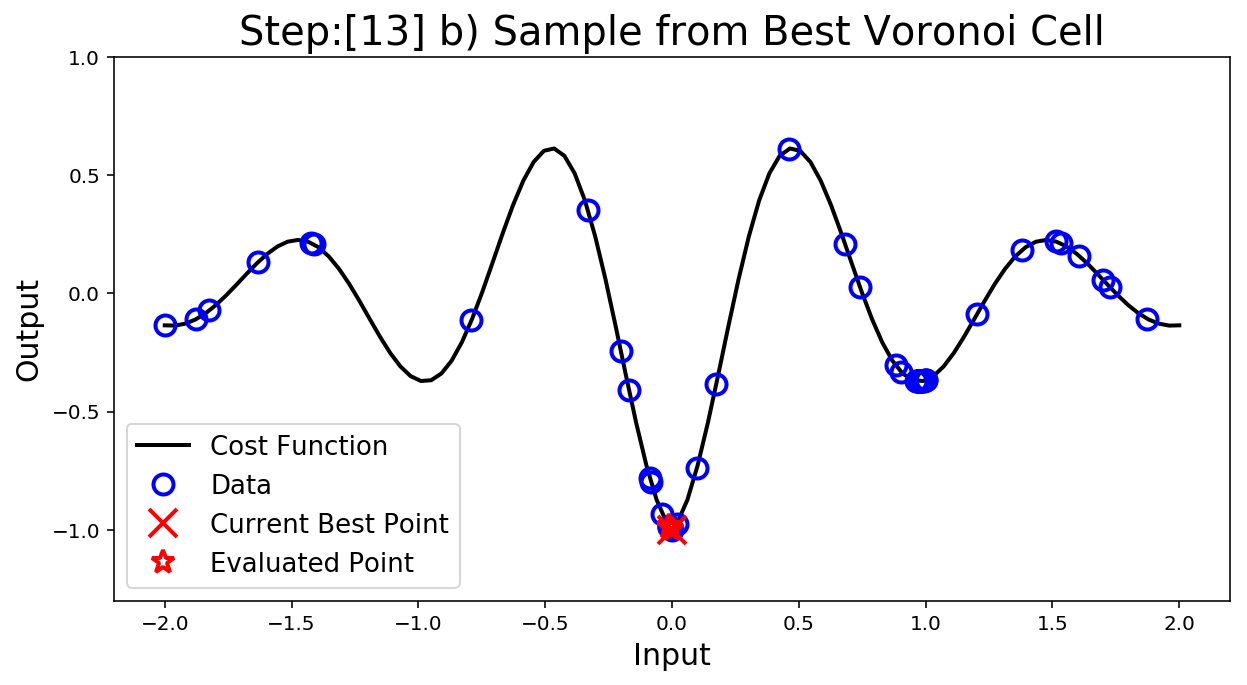

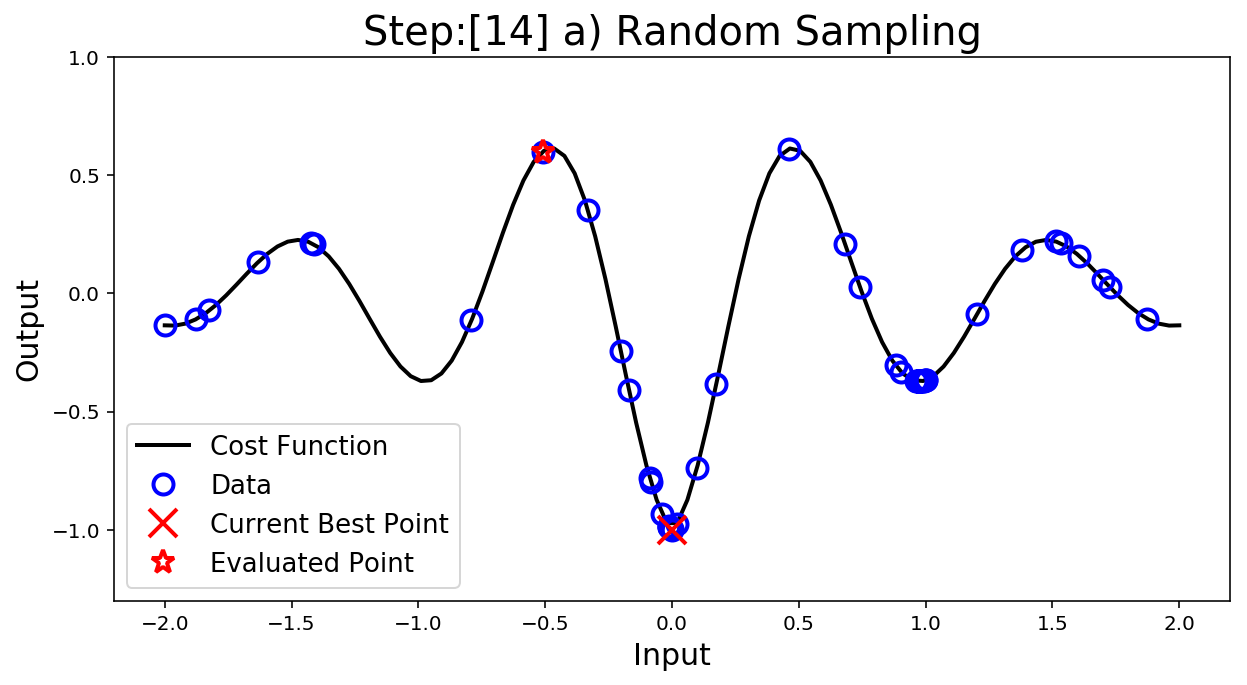

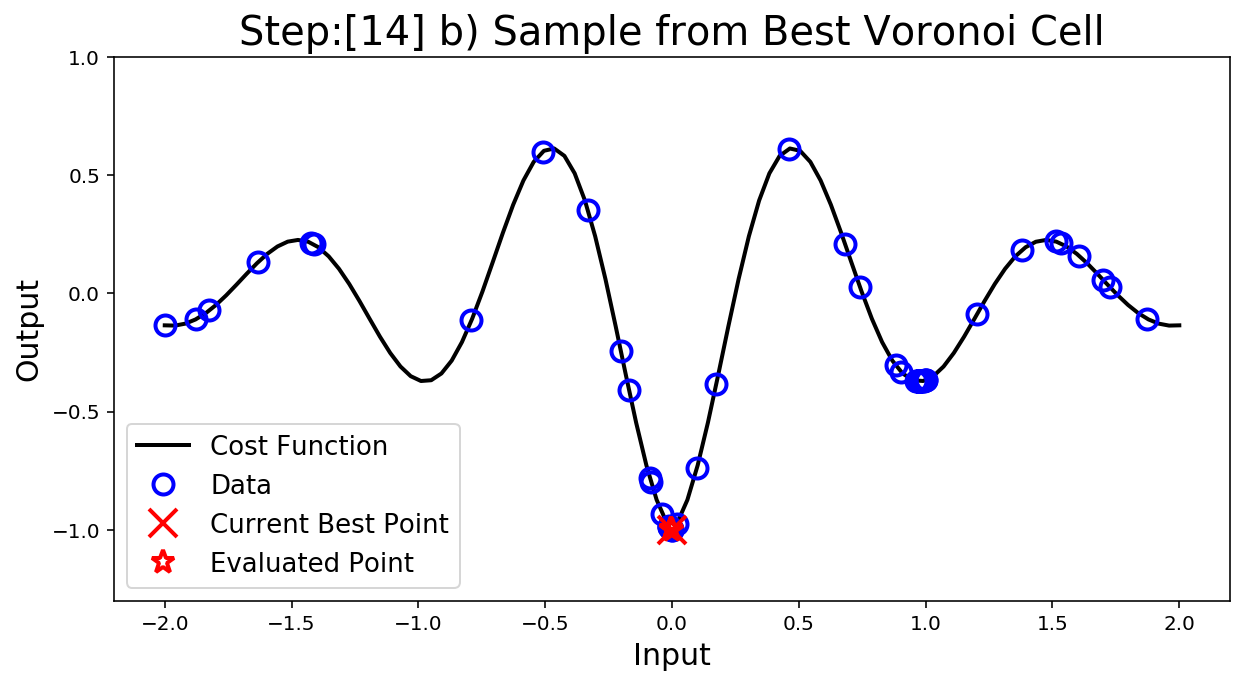

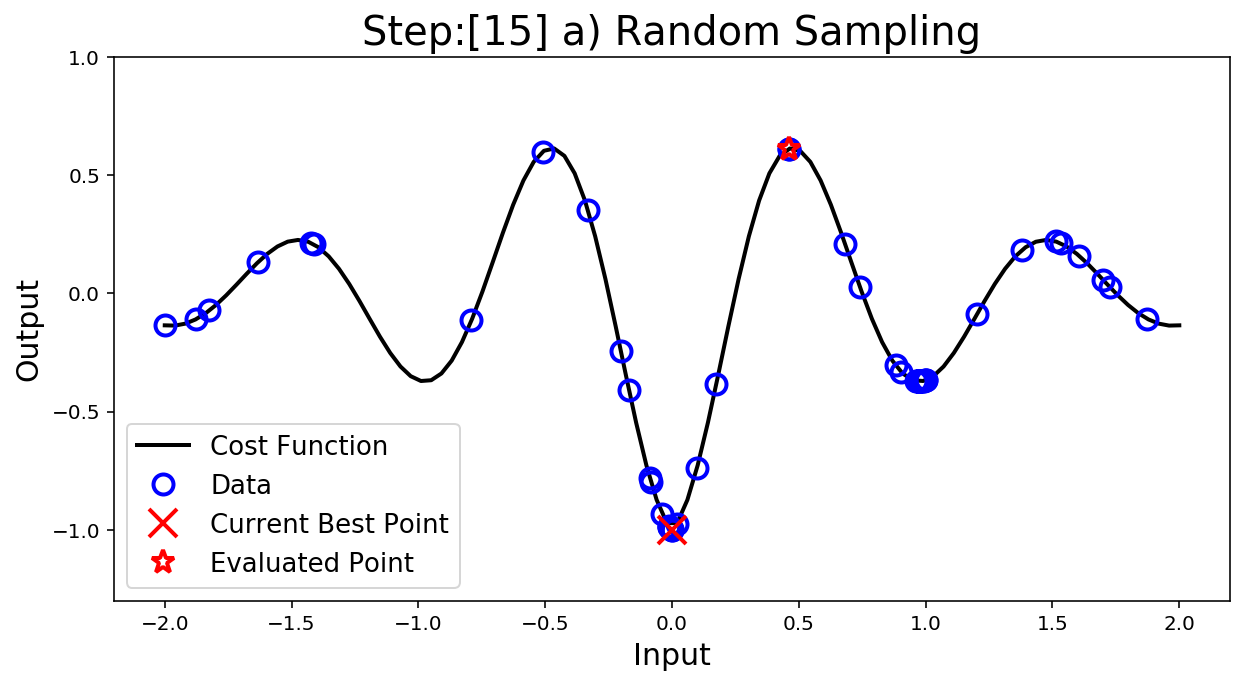

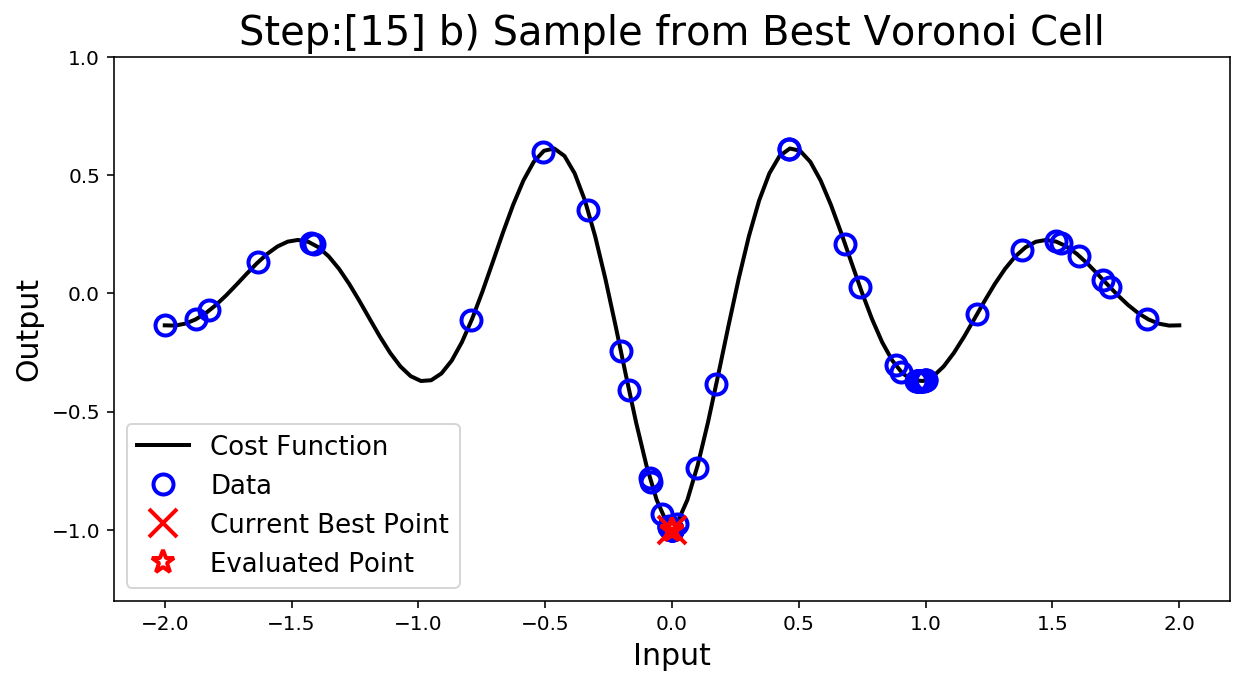

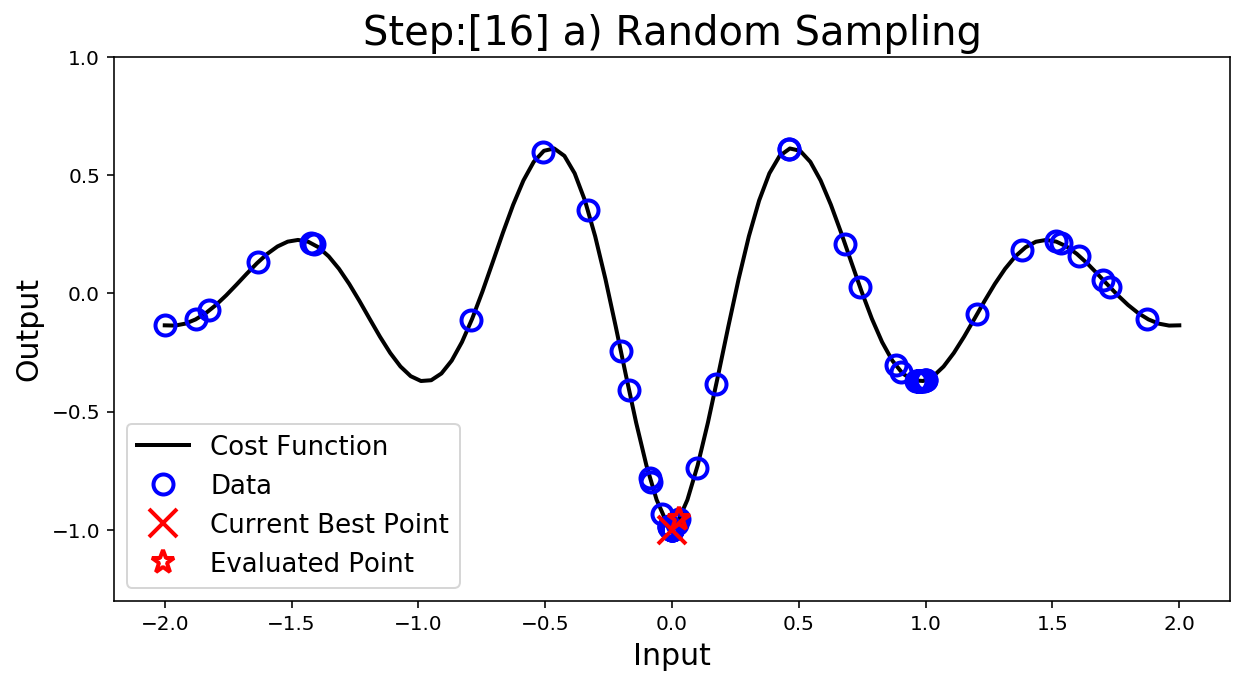

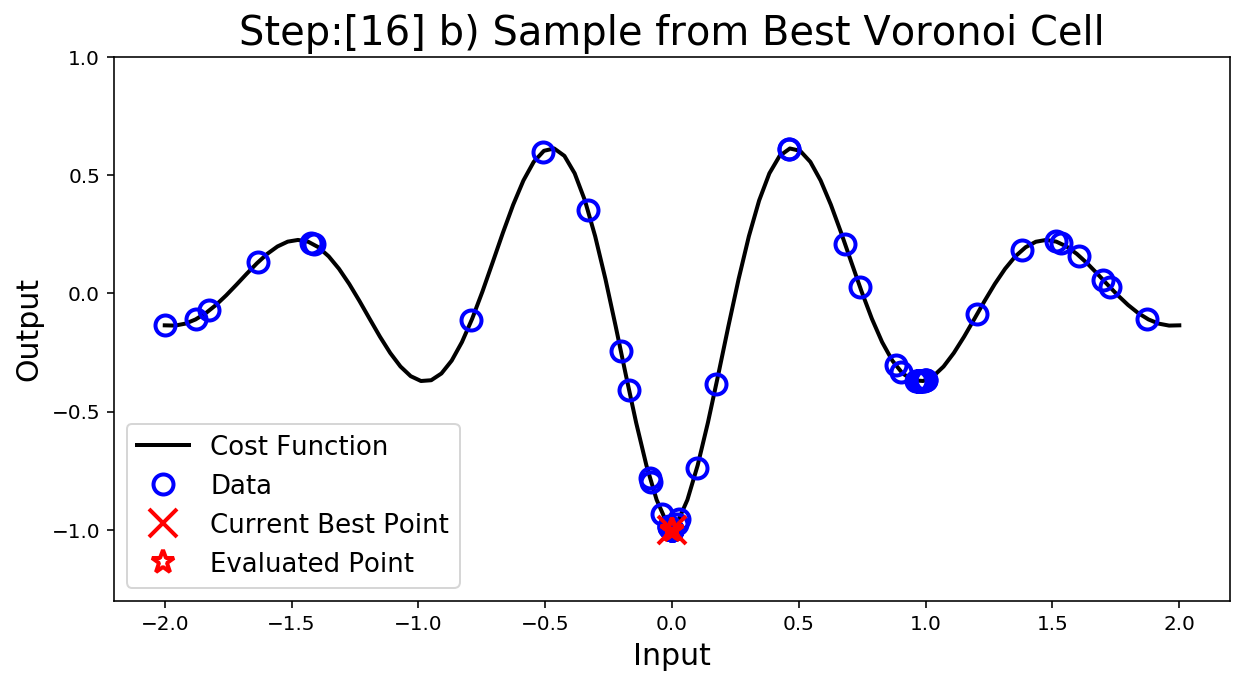

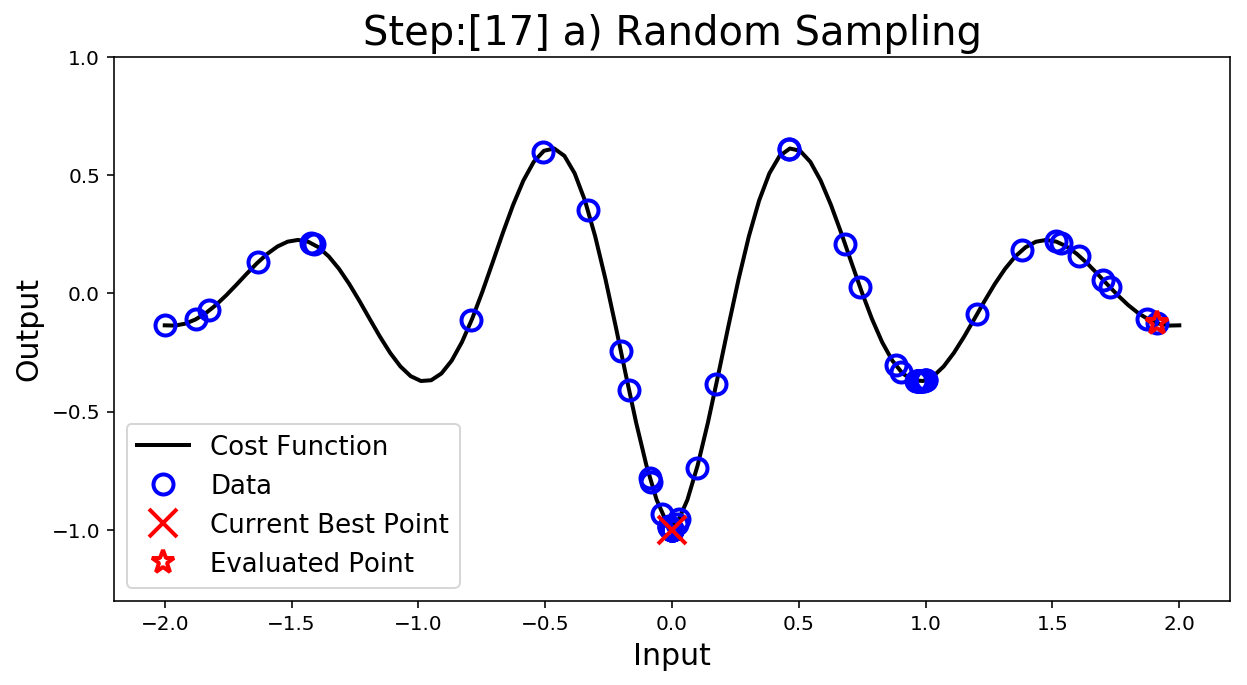

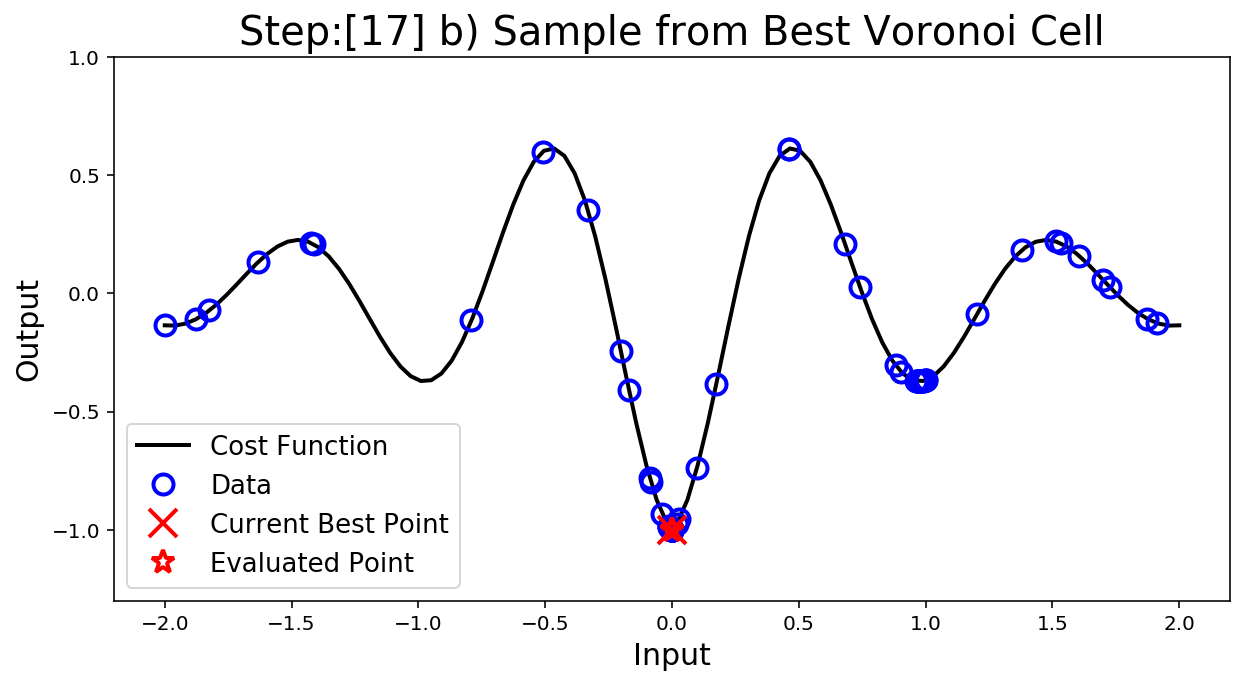

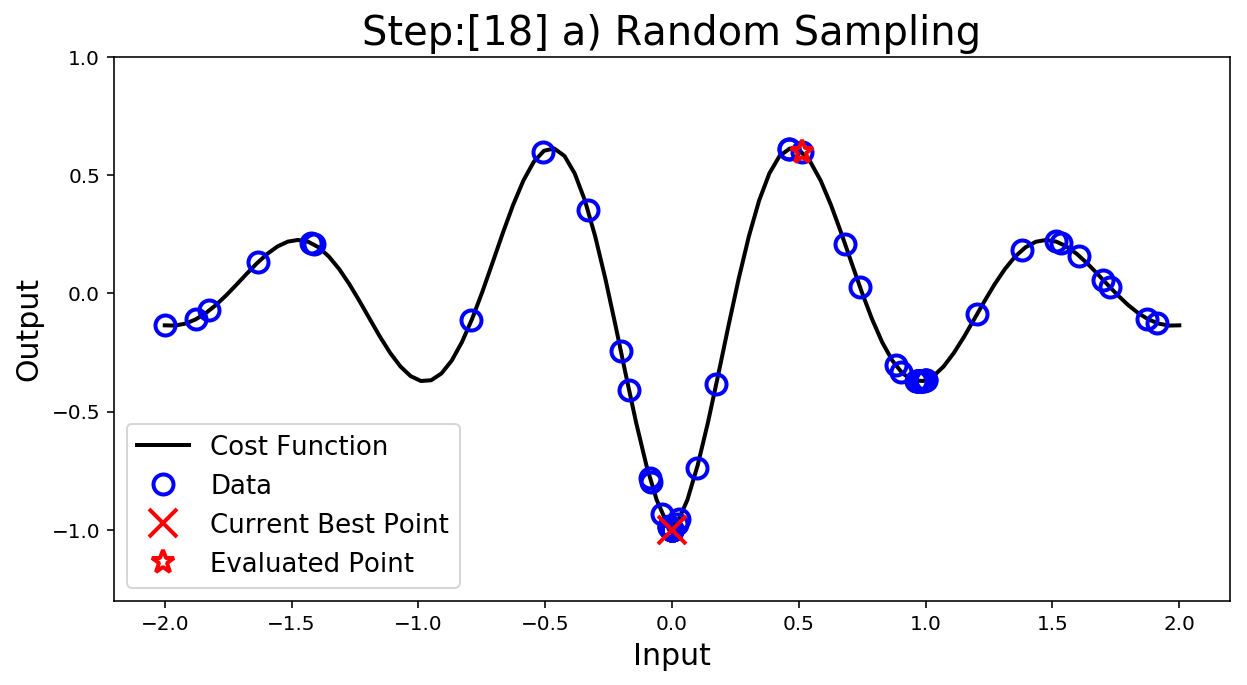

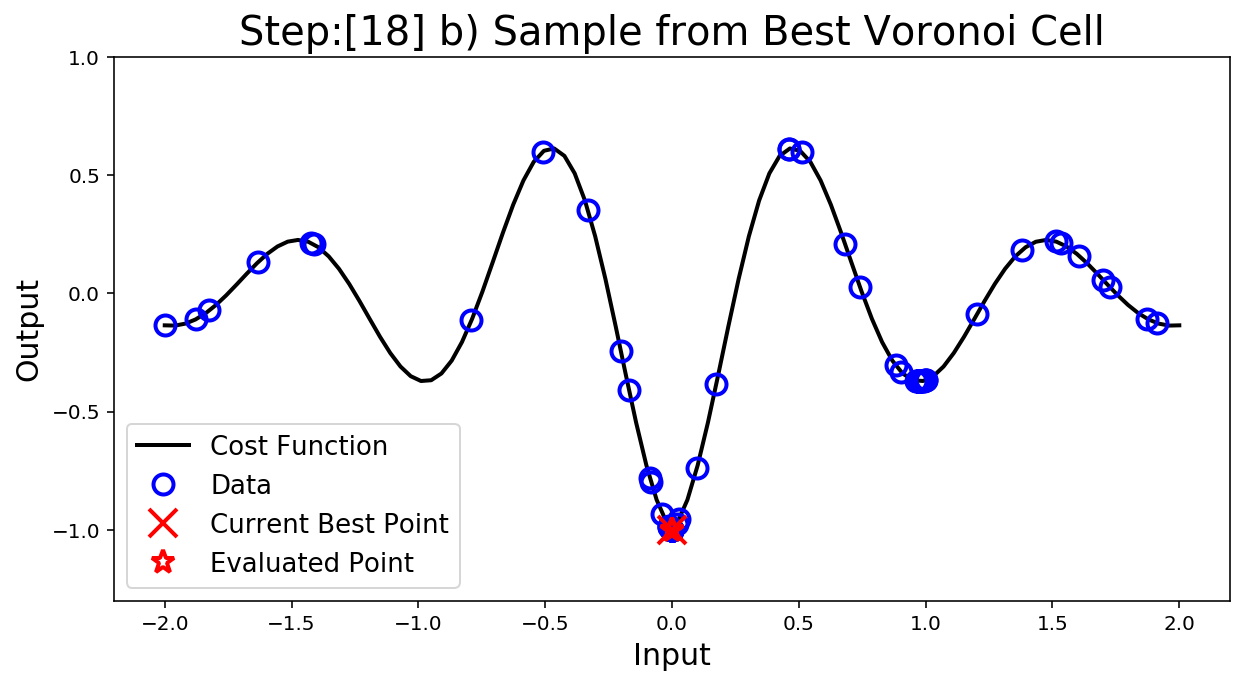

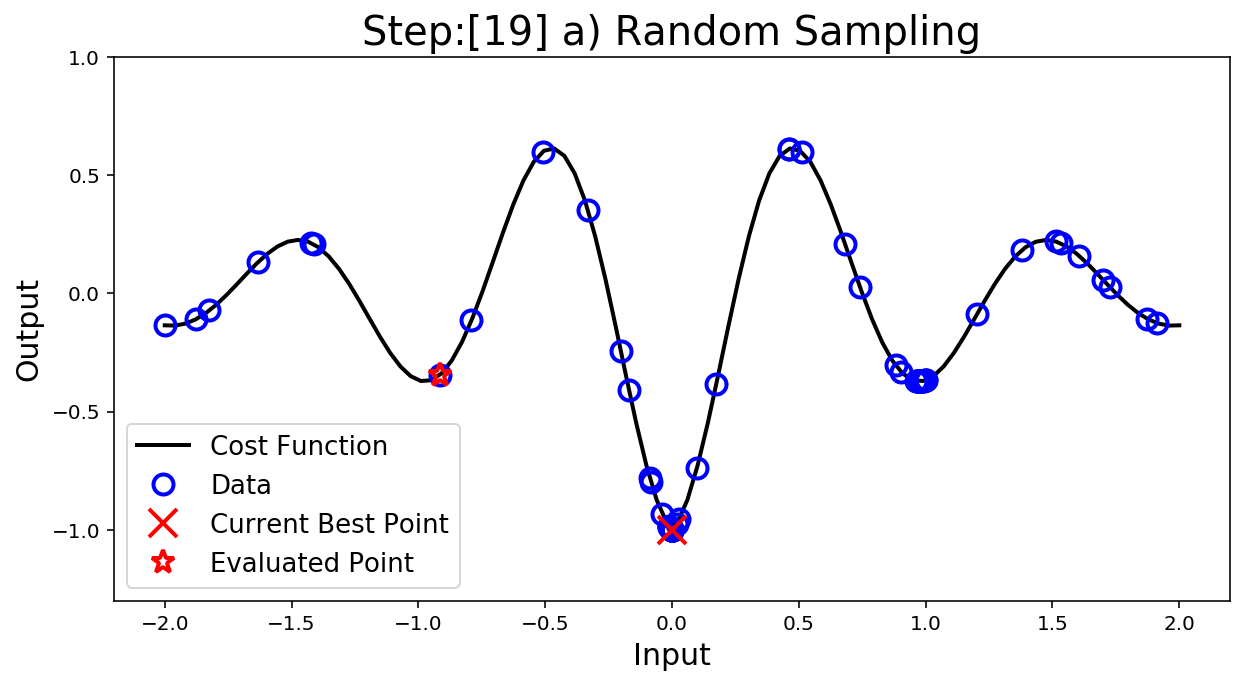

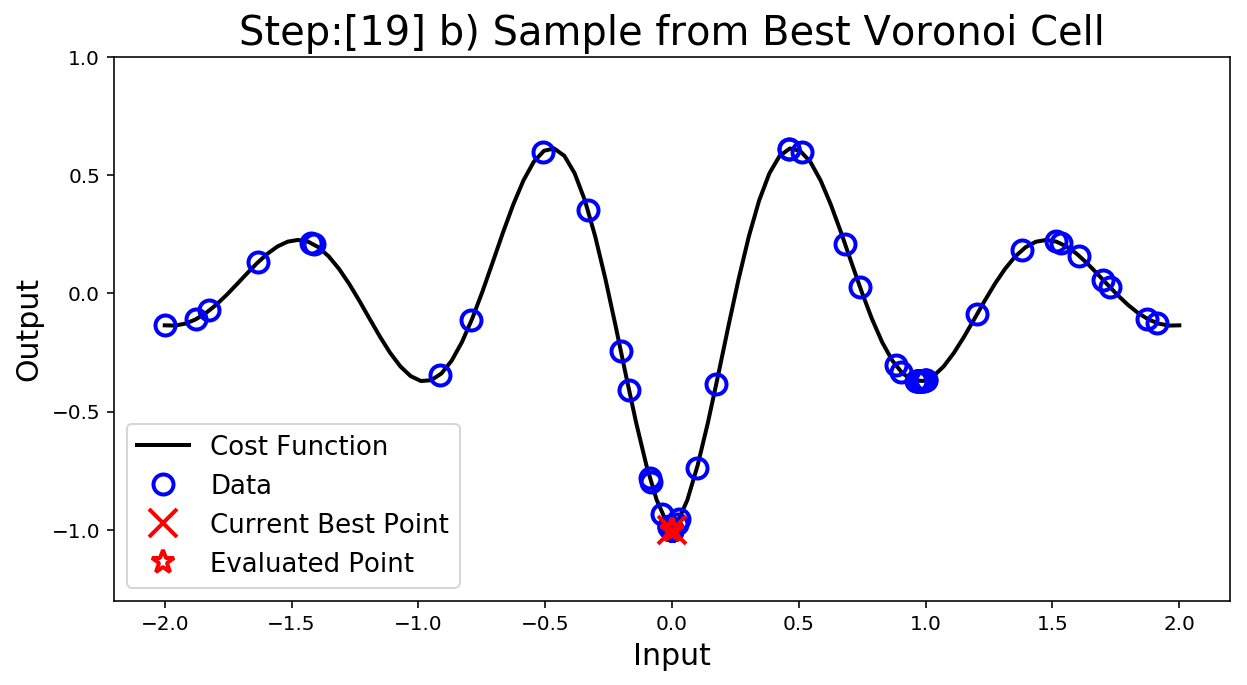

Done.


In [21]:
np.random.seed(seed=seed) # fix random seed 
xdim = x_minmax.shape[0]
x_data,y_data = np.zeros((0,xdim)),np.zeros((0,1))
for it in range(max_step):
    # Random sampling
    x_evals = x_sampler(n_sample=1,x_minmax=x_minmax)
    y_evals = [func_eval(x=x_eval) for x_eval in x_evals] 
    x_evals,y_evals = np.asarray(x_evals)[:,0,:],np.asarray(y_evals)[:,0,:] # reshape
    x_data,y_data = np.concatenate((x_data,x_evals),axis=0),np.concatenate((y_data,y_evals),axis=0) # concatenate
    x_sol,y_sol = get_best_xy(x_data,y_data)
    plot_line(
        x_target,y_target,fmt='-',lc='k',lw=2,label='Cost Function',
        x2=x_data,y2=y_data,fmt2='o',lc2='b',lw2=2,ms2=10,mew2=2,label2='Data',
        x3=x_sol,y3=y_sol,fmt3='x',lc3='r',lw3=4,ms3=14,label3='Current Best Point',
        x4=x_evals,y4=y_evals,fmt4='*',lc4='r',lw4=2,ms4=12,label4='Evaluated Point',
        figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,tstr='Step:[%d] a) Random Sampling'%(it),tfs=20,
        ylim=[-1.3,+1],
        lfs=13,lloc='lower left')
    
    # Sample from the Best Voronoi Cell
    x_sol,y_sol = get_best_xy(x_data,y_data)
    max_try_sbv = 5000
    x_evals = sample_from_best_voronoi_cell(
            x_data,y_data,x_minmax,n_sample=4,max_try_sbv=max_try_sbv)
    y_evals = [func_eval(x=x_eval) for x_eval in x_evals]
    x_evals,y_evals = np.asarray(x_evals)[:,0,:],np.asarray(y_evals)[:,0,:] # reshape
    x_data,y_data = np.concatenate((x_data,x_evals),axis=0),np.concatenate((y_data,y_evals),axis=0) # concatenate
    plot_line(
        x_target,y_target,fmt='-',lc='k',lw=2,label='Cost Function',
        x2=x_data,y2=y_data,fmt2='o',lc2='b',lw2=2,ms2=10,mew2=2,label2='Data',
        x3=x_sol,y3=y_sol,fmt3='x',lc3='r',lw3=4,ms3=14,label3='Current Best Point',
        x4=x_evals,y4=y_evals,fmt4='*',lc4='r',lw4=2,ms4=12,label4='Evaluated Point',
        figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,tstr='Step:[%d] b) Sample from Best Voronoi Cell'%(it),tfs=20,
        ylim=[-1.3,+1],
        lfs=13,lloc='lower left')
print ("Done.")